In [1]:
# The yolov8 model is trained using Google Colab, so just the necessary files are exported to this project

In [1]:
# import necessary libraries
from IPython.display import Image, display
import os
from IPython import display
display.clear_output()

In [7]:
# install the roboflow dataset, this dataset is created by me using the arabic dataset previously exported in this project
# it has 180 images per digit, 90 of them in their original sizes and 90 of them in random sizes in order to be able
# to detect all sizes of digits
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CtApa0G4J3YNfbq3UAhI")
project = rf.workspace("object-detection-uscpv").project("arabic-digits")
dataset = project.version(10).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.41, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Arabic-Digits-10 in yolov8:: 100%|█| 3612/3612


In [9]:
# This stage is compiled using Google Colab since it gives a GPU usage service, so some unnecessary files not exported.
# the yolov8 model is trained with the installed dataset in the previous stage
# the model works through the whole dataset 50 times
# image sizes are extended to 640x640 by default by roboflow
!yolo task=detect mode=train model=yolov8s.pt data=../../yolov8_datasets/arabic_dataset/Arabic-Digits-10/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.41 🚀 Python-3.9.13 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=../../yolov8_datasets/arabic_dataset/Arabic-Digits-10/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz

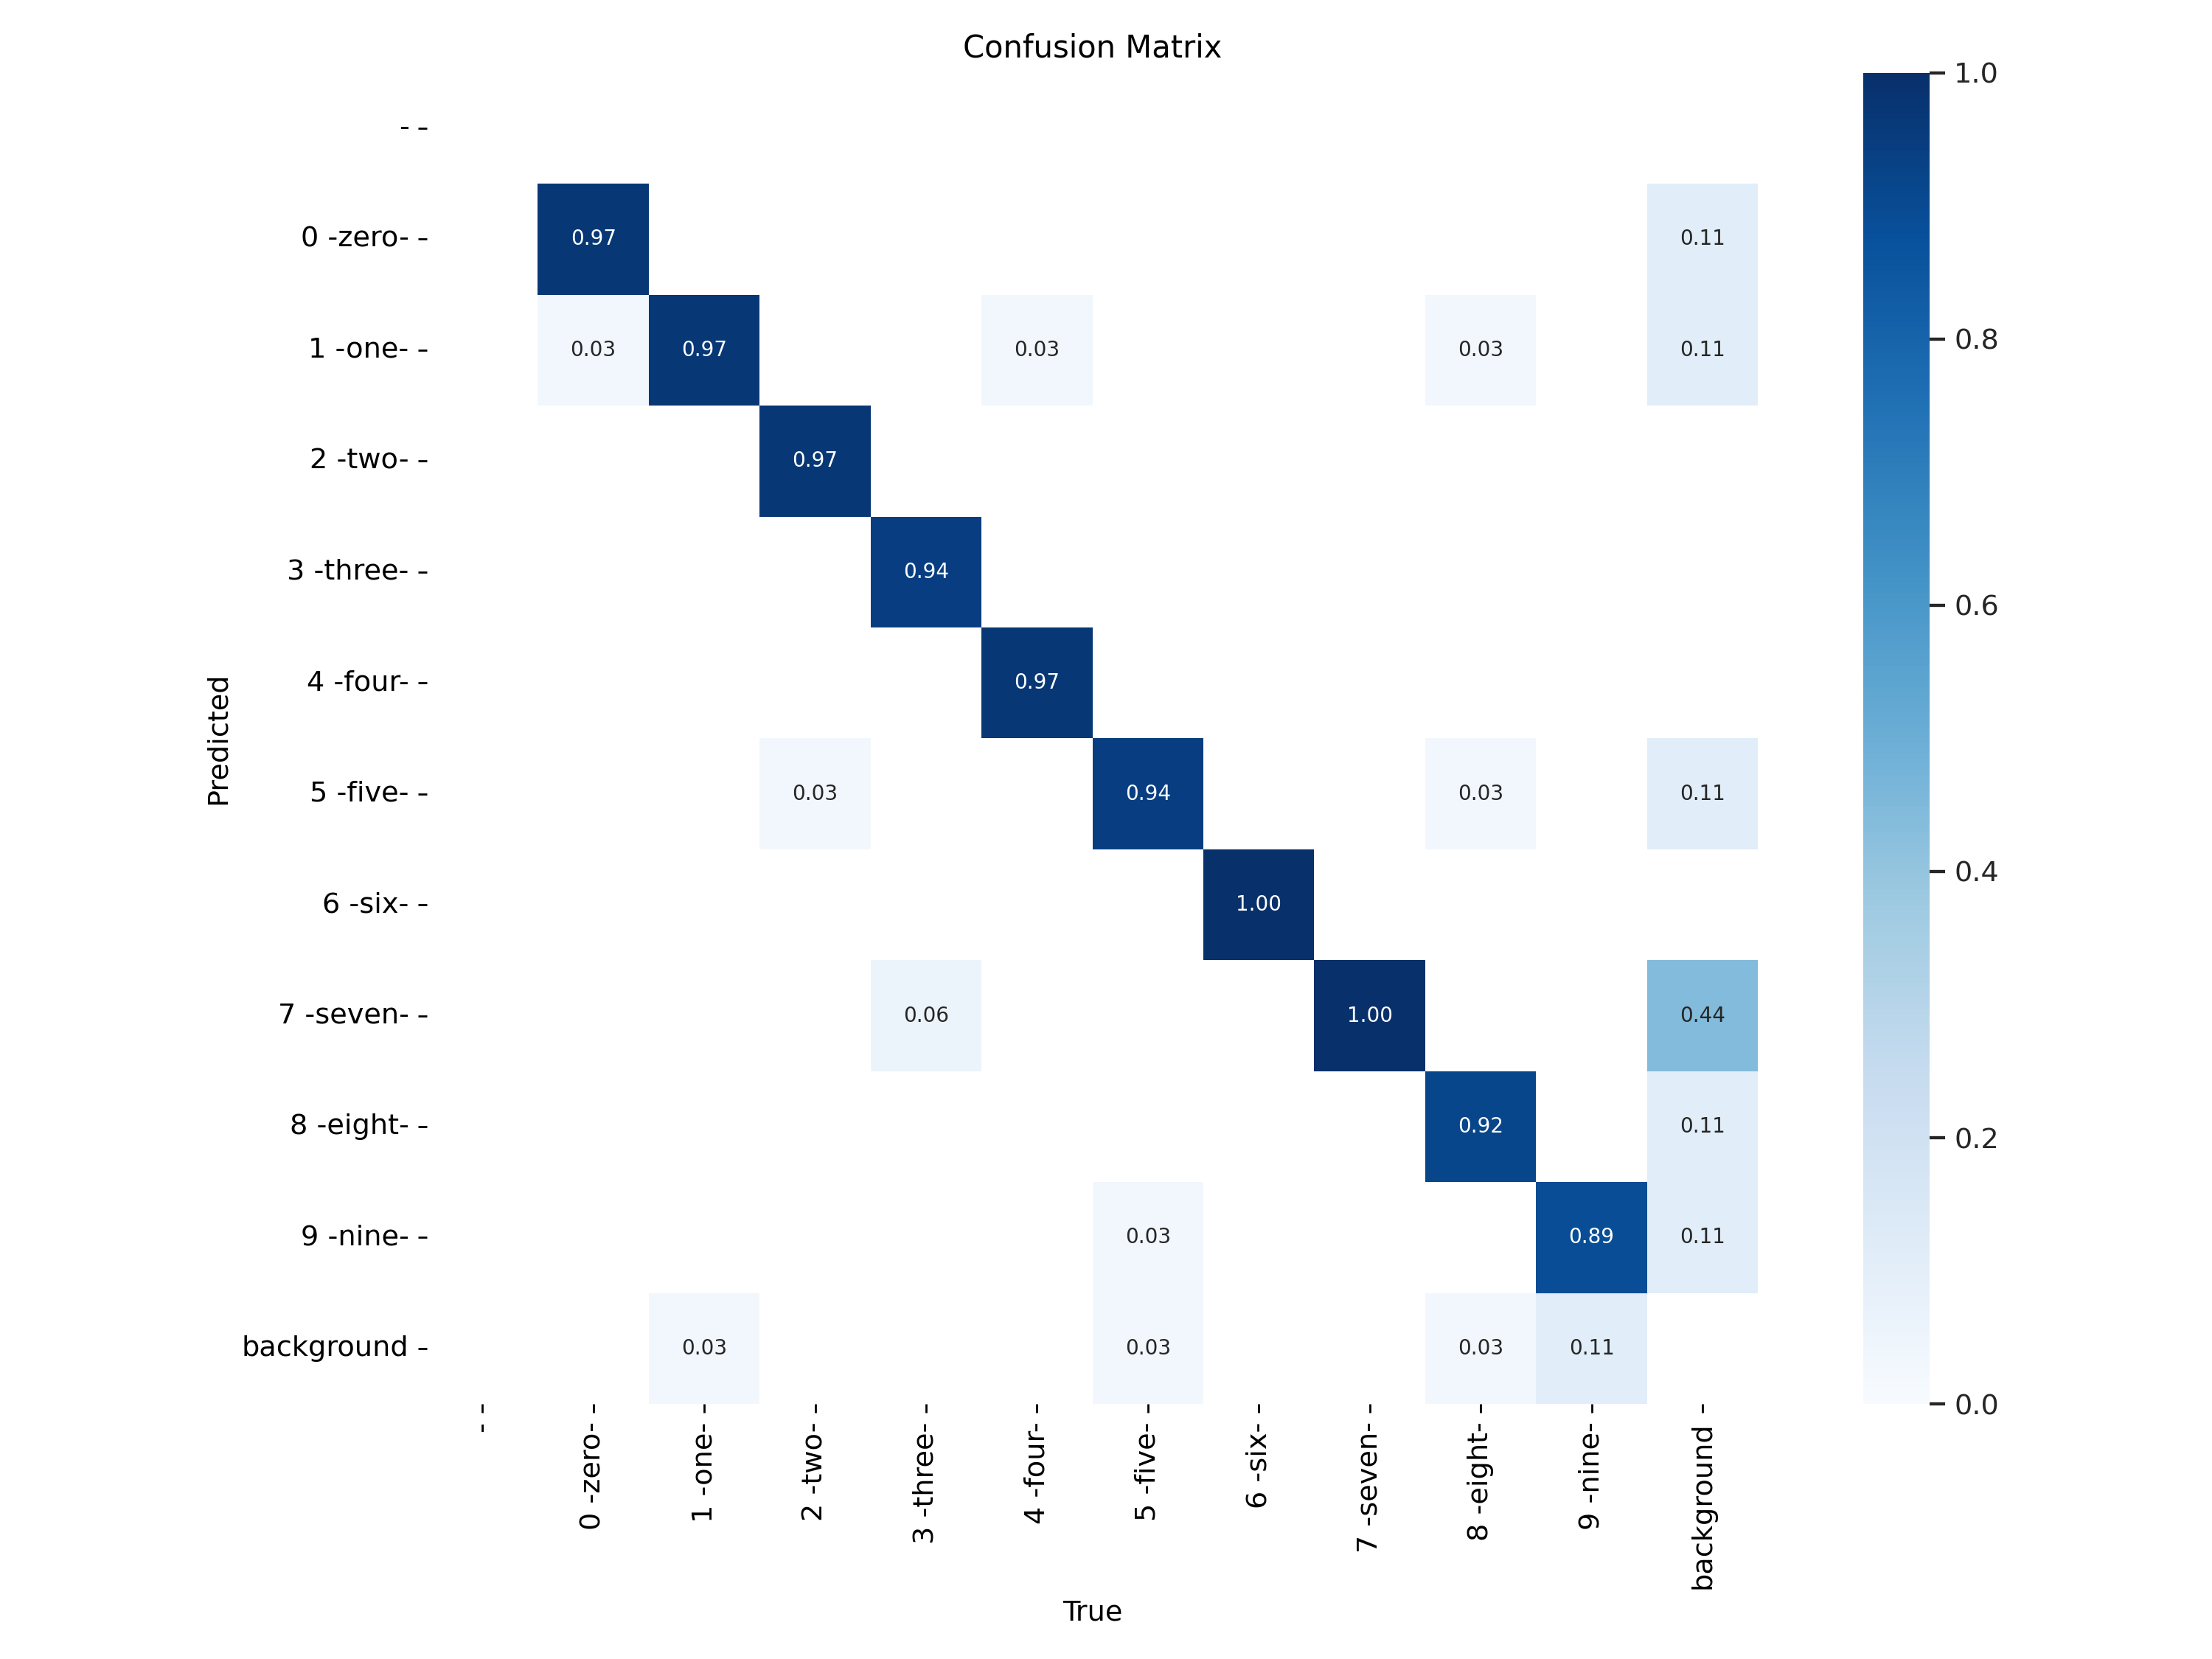

In [2]:
# shows the confusion matrix of the trained model
# for example for the class '0 -zero-', it detected the digit correctly with 0.97.
# it also detected some of the eights as background with 0.11.
Image(filename='../../results/arabic/confusion_matrix.png')

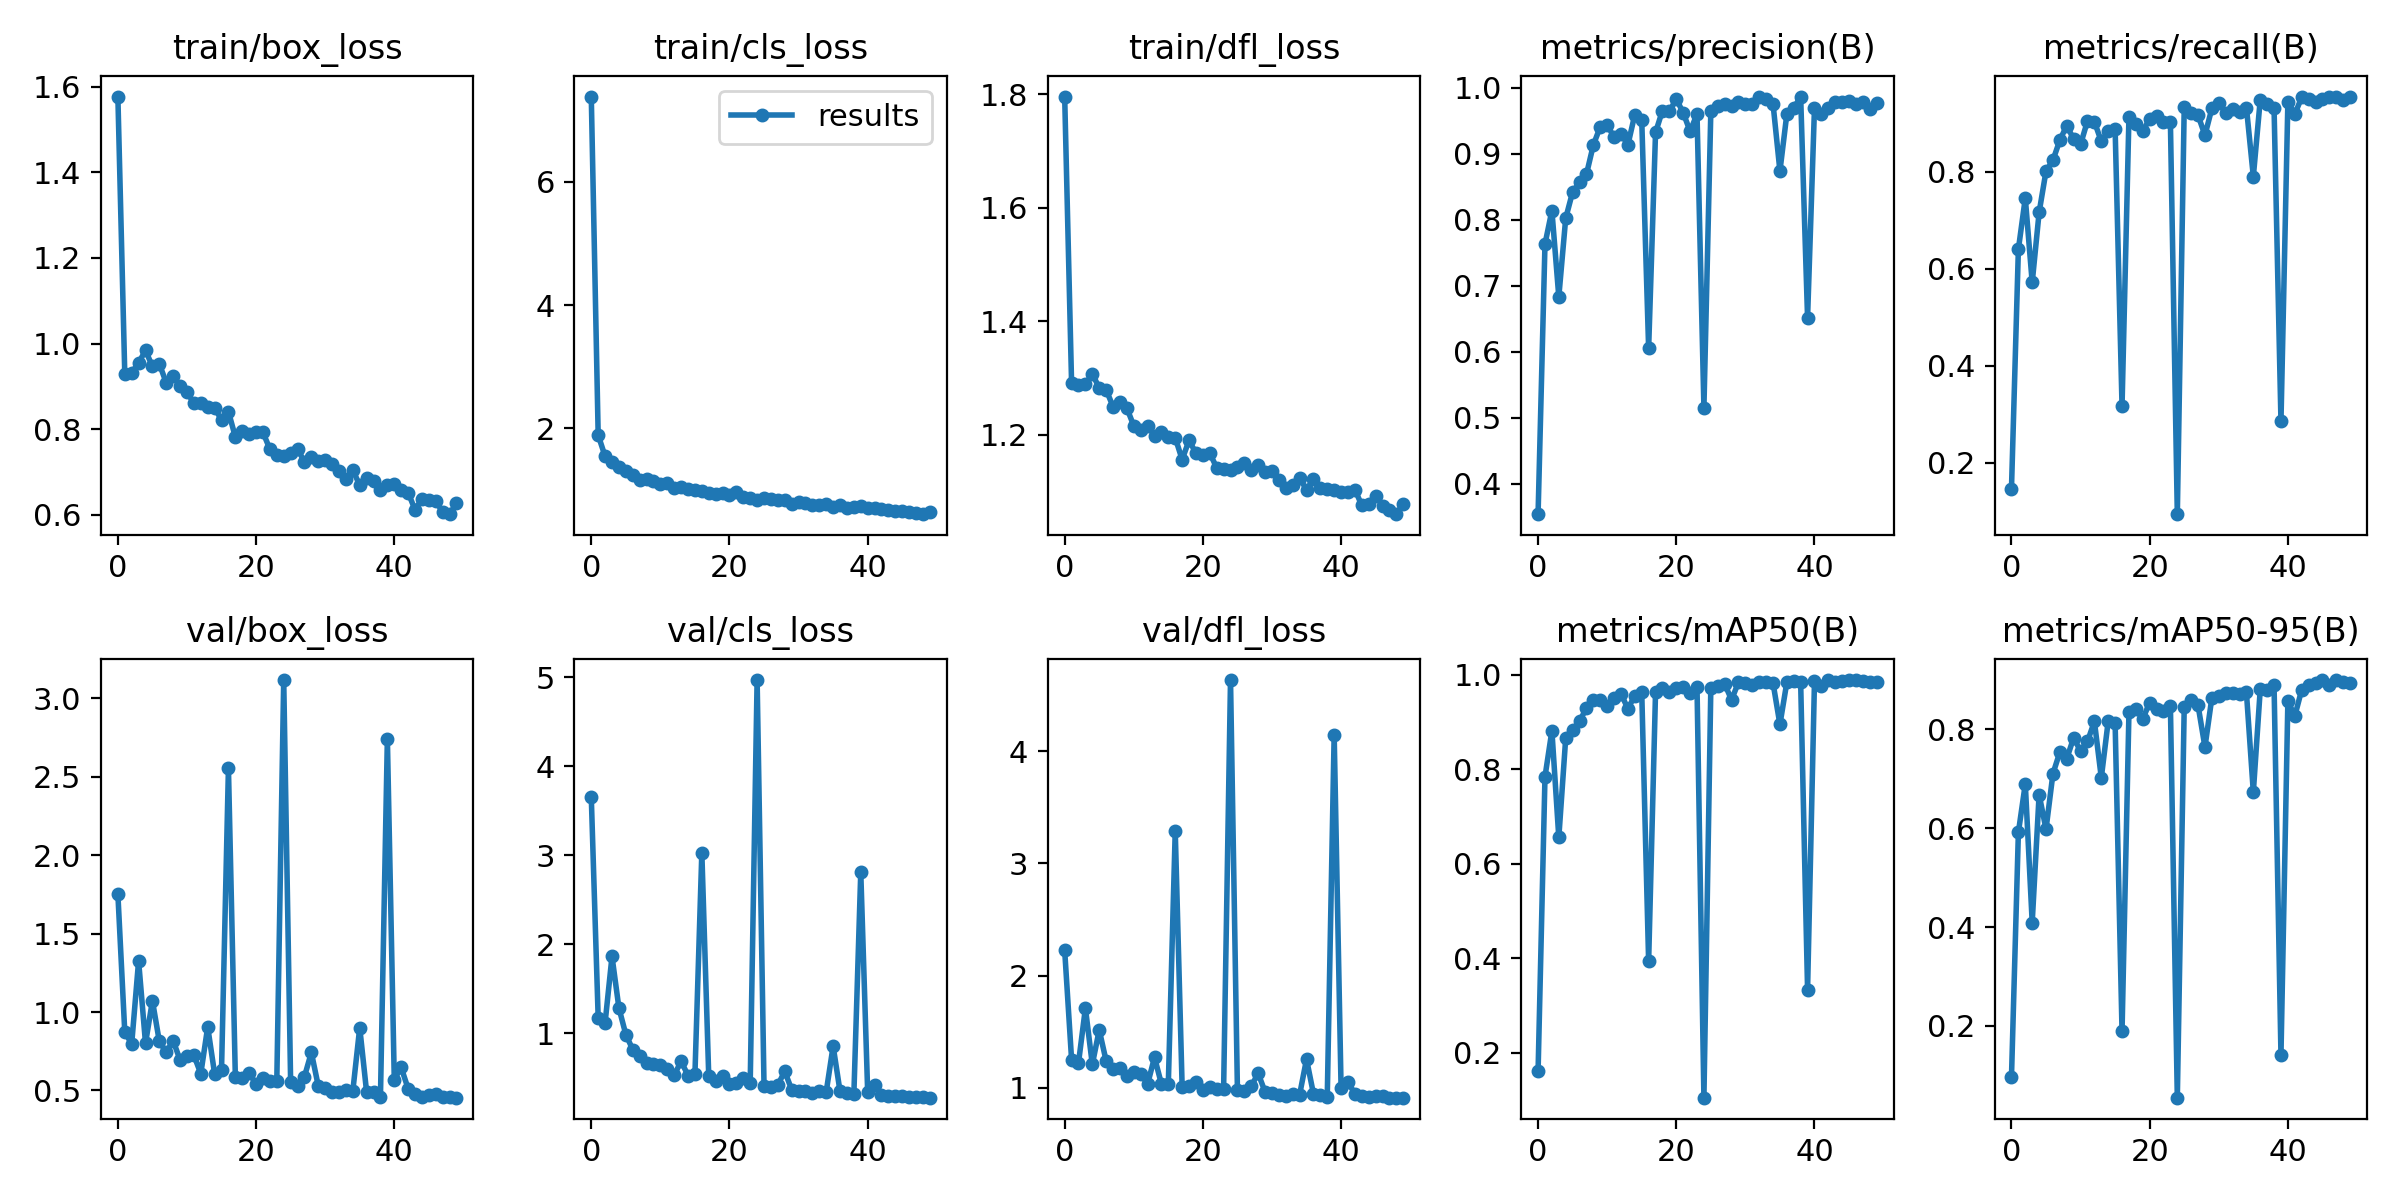

In [11]:
# shows the losses and metrics of the trained model
# losses are decreased in both training and validation data
# Precision measures how much of the bbox predictions are correct
# Recall measures how much of the true bbox were correctly predicted
# the last two tables are the mean Average Precision (mAP) at IoU (Intersection over Union) threshold of 0.5, and threshold between 0.5 and 0.95.
Image(filename = '../../results/arabic/results.png')

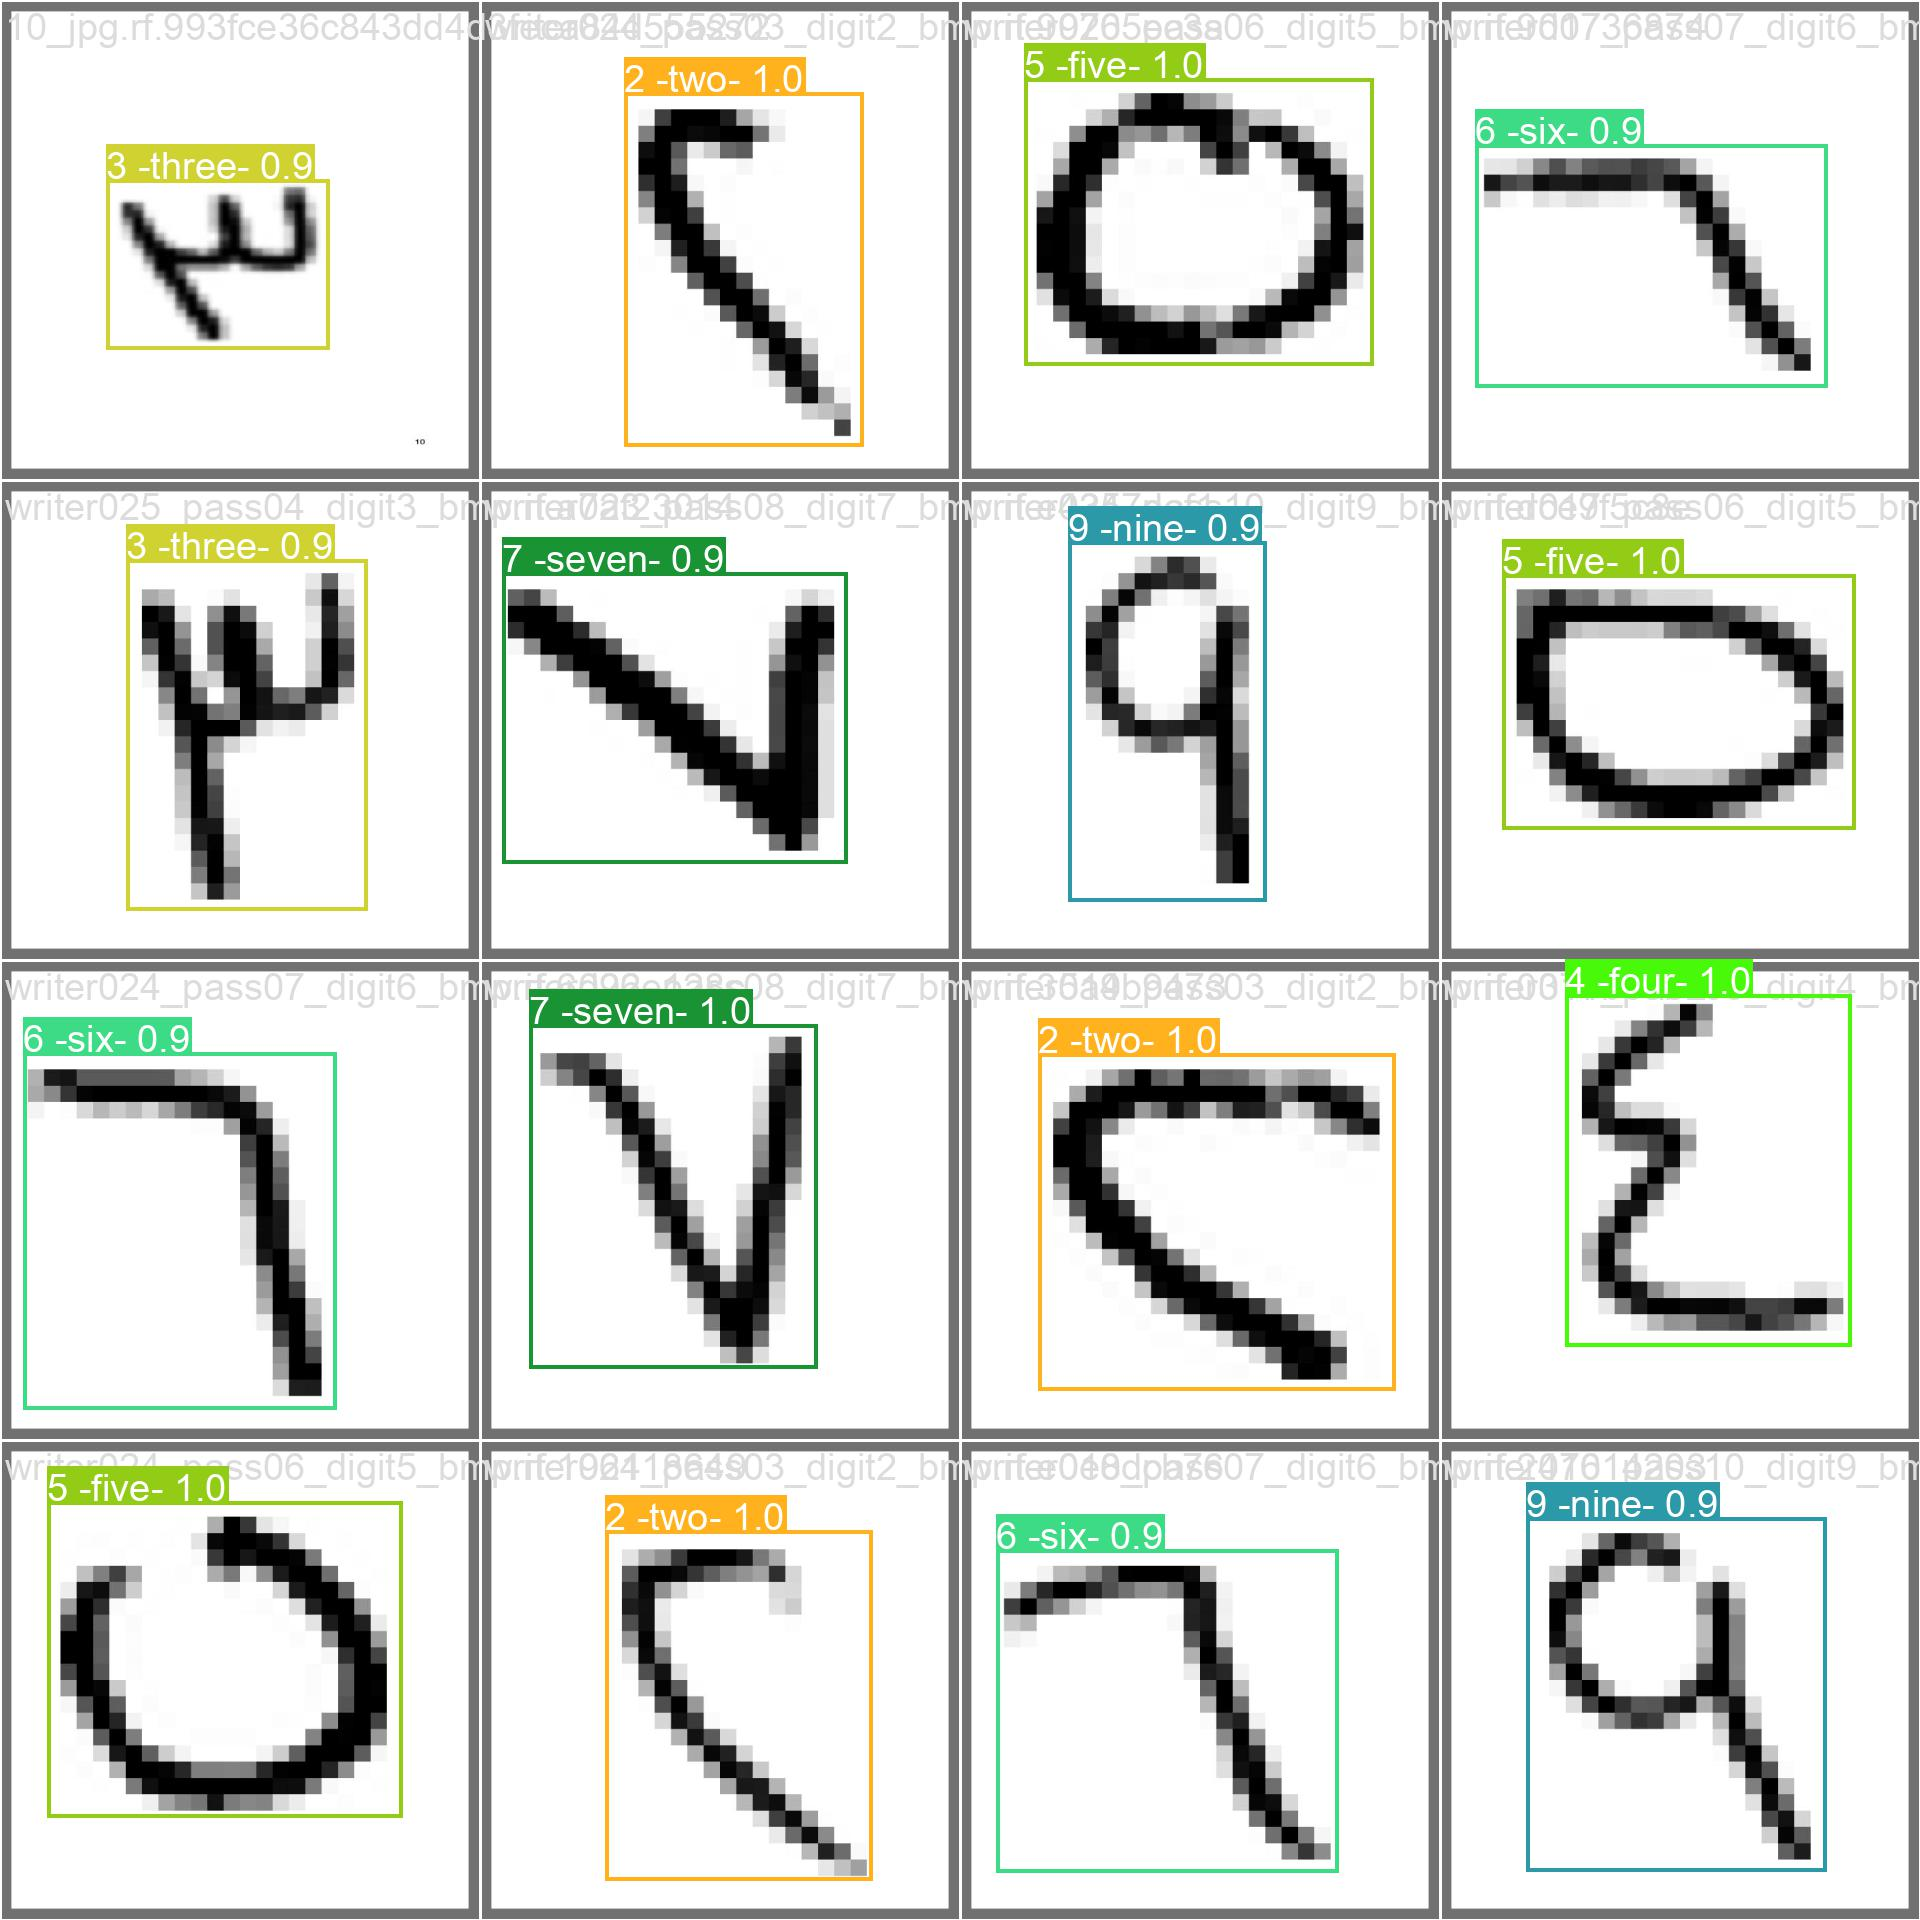

In [12]:
# The first batch, size of 16, images predictions
Image(filename='../../results/arabic/val_batch0_pred.jpg')

In [13]:
# tests the model on test images
!yolo task=detect mode=predict model=../../yolov8_weights/arabic/best.pt conf=0.25 source=../../yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images save=True

Ultralytics YOLOv8.0.41 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

image 1/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/11_jpg.rf.009a91d4b564eb5b9ffd9d6778fc3c3a.jpg: 640x640 1 7 -seven-, 446.7ms
image 2/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/15_jpg.rf.08e727935d81fa4c2c0e450b38f237fc.jpg: 640x640 1 5 -five-, 325.0ms
image 3/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/15_jpg.rf.14f34e80983289af08591f0d80ded9ab.jpg: 640x640 1 8 -eight-, 321.7ms
image 4/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_d

image 35/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/41_jpg.rf.b409c20ddd393b859a3bc6dce061f291.jpg: 640x640 1 0 -zero-, 346.4ms
image 36/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/43_jpg.rf.68054fdc35beb0f848678e08c0a3ee05.jpg: 640x640 1 6 -six-, 332.5ms
image 37/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/43_jpg.rf.9598fe9214b881364ac52862d69727f5.jpg: 640x640 1 1 -one-, 343.4ms
image 38/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/45_jpg.rf.f80abc48f386e1d596295e8e821efa02.jpg: 640x640 1 2 -two-, 343.0ms
image 39/190 /Users/zeynepnuraksay/Desktop/final_year_project/z

image 70/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/75_jpg.rf.fb18960c2ca47207e11dc177a44913a8.jpg: 640x640 1 5 -five-, 347.4ms
image 71/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/76_jpg.rf.69b67c217b2918ca54985e8f24625d09.jpg: 640x640 1 9 -nine-, 350.6ms
image 72/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/77_jpg.rf.64256306eecc55ffd8187417d35adfa1.jpg: 640x640 1 2 -two-, 344.0ms
image 73/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/78_jpg.rf.c61992989e1aa1e13f756c3b9f4080a9.jpg: 640x640 1 6 -six-, 346.3ms
image 74/190 /Users/zeynepnuraksay/Desktop/final_year_project/

image 104/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer009_pass03_digit2_bmp.rf.140c5336d257e983897a165d46c0907c.jpg: 640x640 1 2 -two-, 357.9ms
image 105/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer010_pass10_digit9_bmp.rf.b3fddb4efae47b3cfbf33664a8beca0b.jpg: 640x640 1 9 -nine-, 361.4ms
image 106/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer011_pass01_digit0_bmp.rf.35f8463e8b9519425563c0c3b0034f35.jpg: 640x640 1 0 -zero-, 356.6ms
image 107/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer012_pass02_digit1_bmp.rf.f86aef084d96a5a275d2424050422851.jpg: 6

image 136/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer040_pass02_digit1_bmp.rf.c62c33169539ec02ffd6385afb1d34ce.jpg: 640x640 1 1 -one-, 368.6ms
image 137/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer040_pass06_digit5_bmp.rf.c04339392558fce26371cf60c76d9514.jpg: 640x640 1 5 -five-, 354.5ms
image 138/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer040_pass08_digit7_bmp.rf.f9a119008d5c40ef0289ca456b2b879d.jpg: 640x640 1 7 -seven-, 366.9ms
image 139/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer041_pass02_digit1_bmp.rf.044105f3640bdf56b81aff0530f57184.jpg: 

image 168/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer070_pass09_digit8_bmp.rf.1ddd80799c0e56fed68b017917ecab72.jpg: 640x640 1 8 -eight-, 468.5ms
image 169/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer071_pass01_digit0_bmp.rf.c19ac52524f6a65633a60b8ddb7cbcf6.jpg: 640x640 1 0 -zero-, 451.4ms
image 170/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer071_pass05_digit4_bmp.rf.969461f26bef2de2f11cbc2f660df120.jpg: 640x640 1 4 -four-, 451.6ms
image 171/190 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/arabic_dataset/Arabic-Digits-10/test/images/writer071_pass09_digit8_bmp.rf.c9f3ecfc91ff0a0eb97ae2baf89aee29.jpg:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


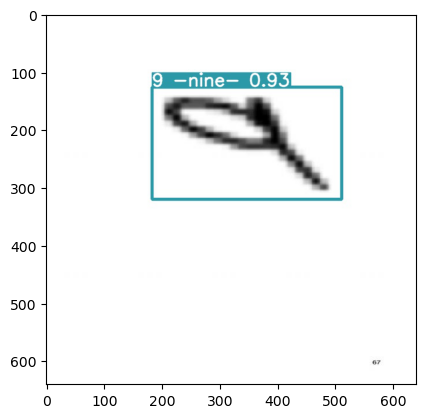

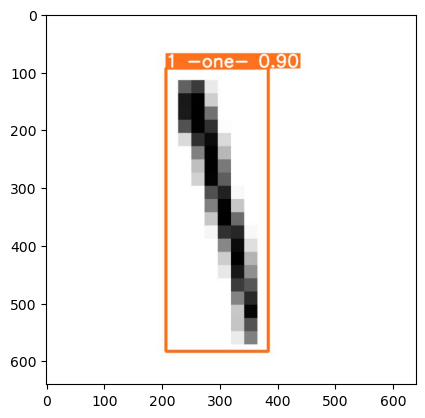

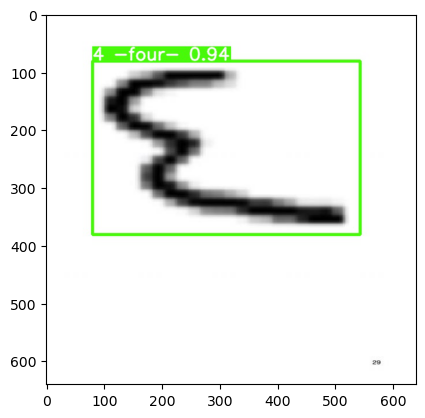

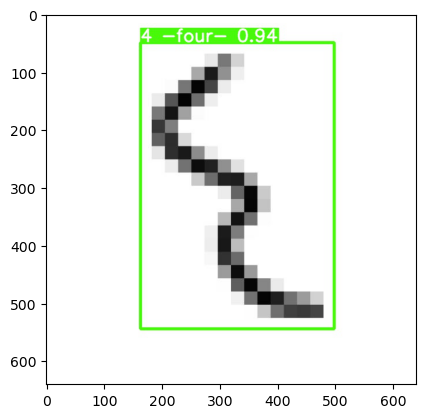

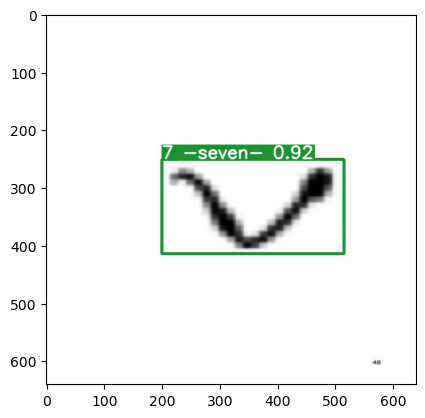

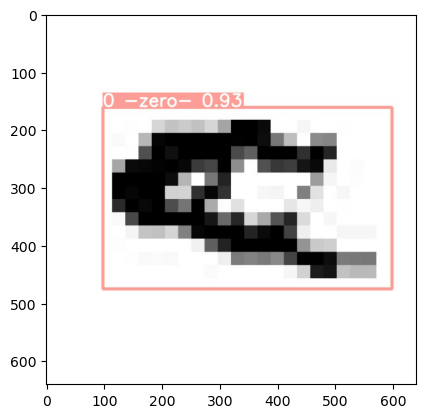

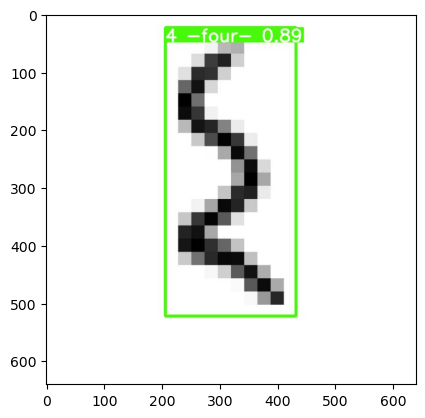

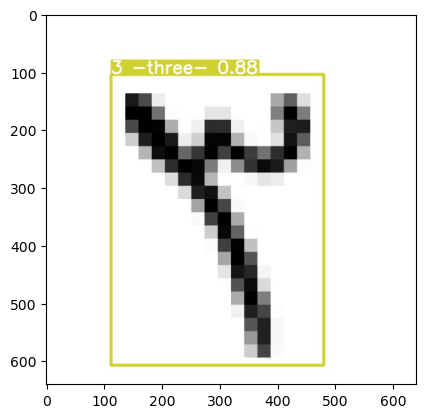

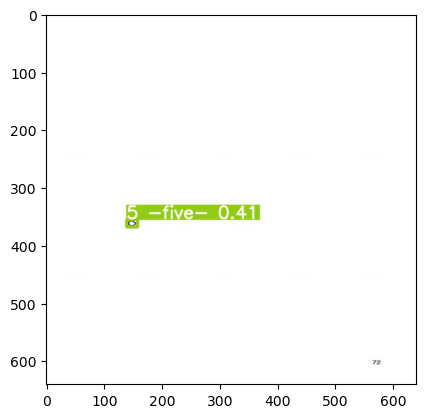

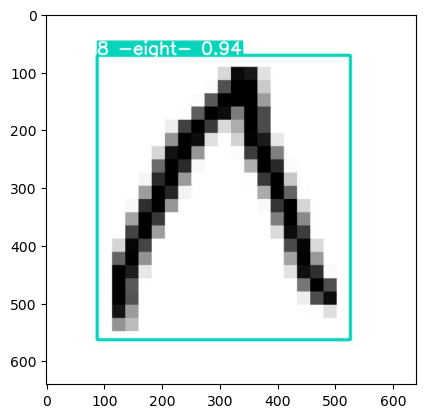

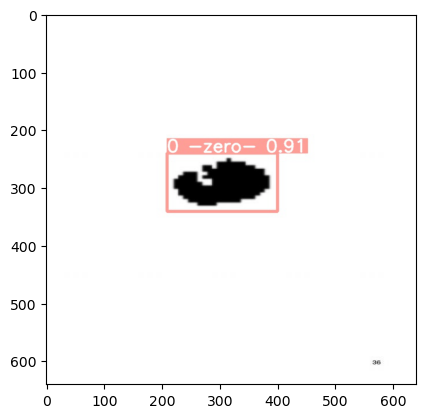

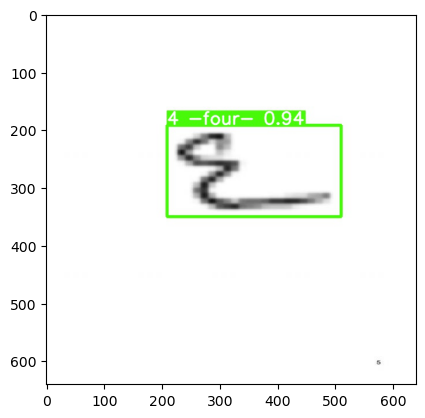

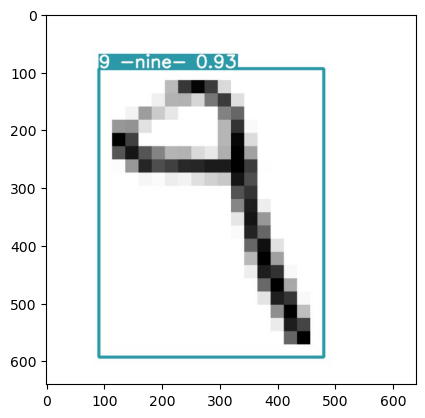

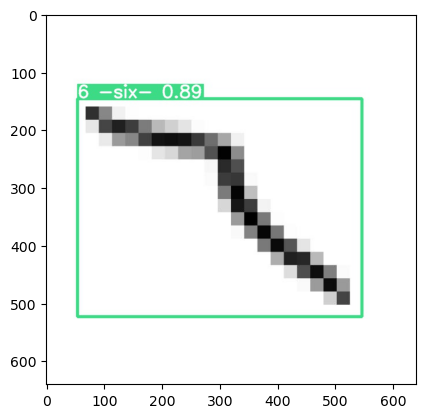

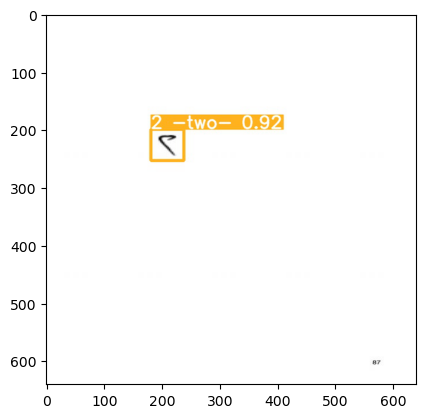

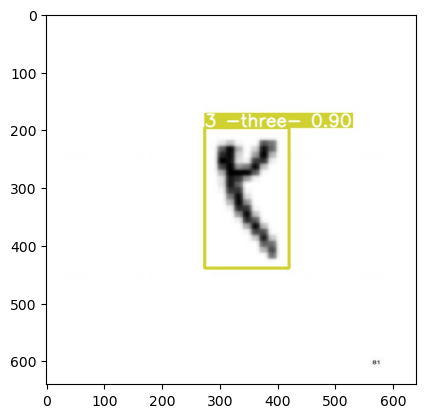

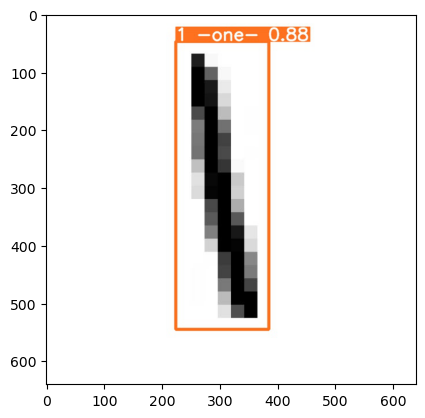

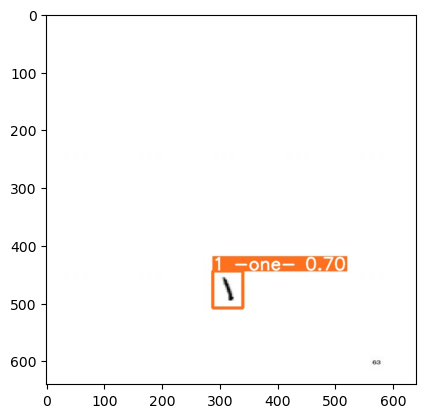

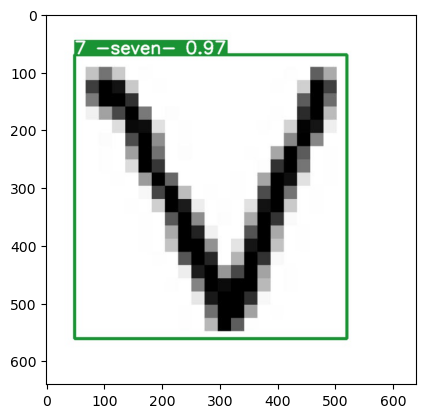

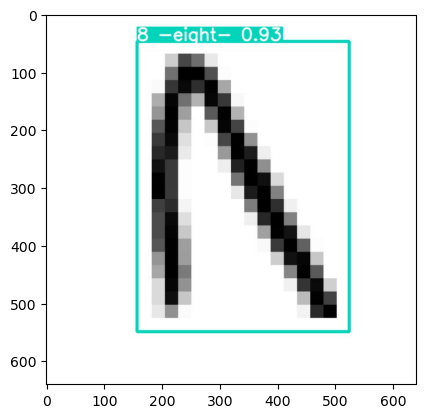

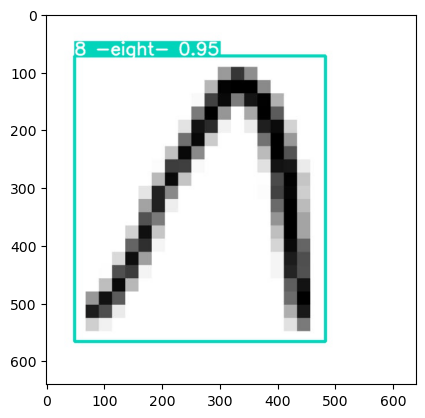

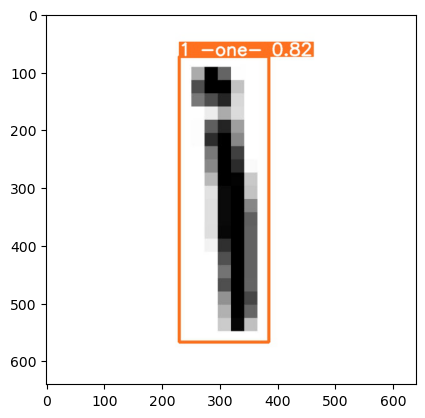

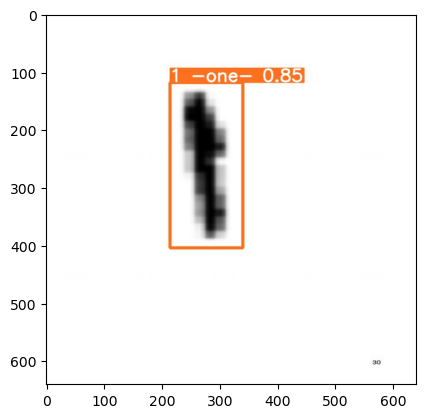

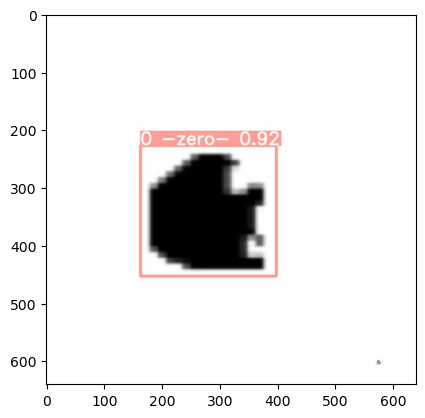

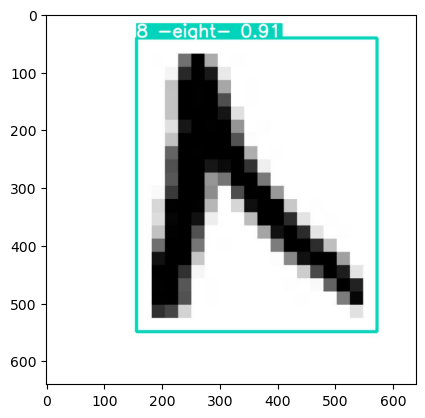

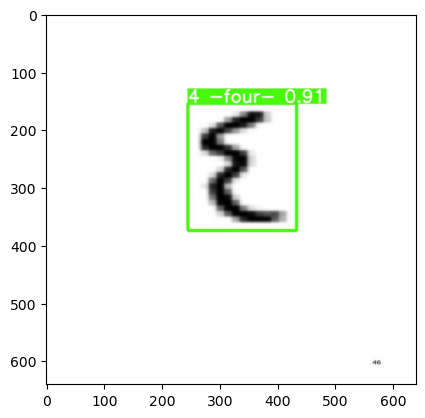

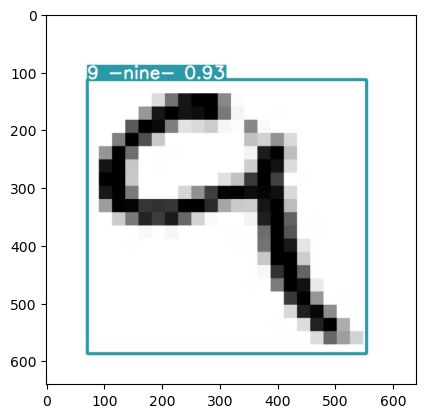

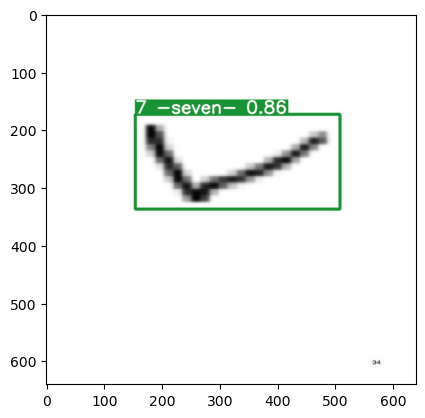

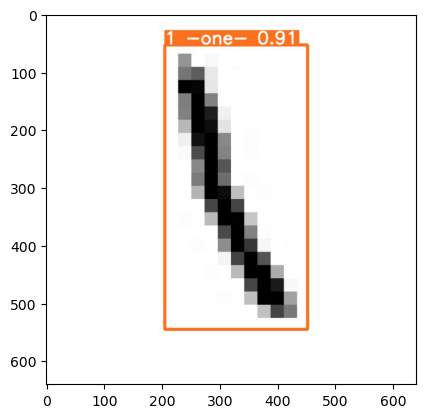

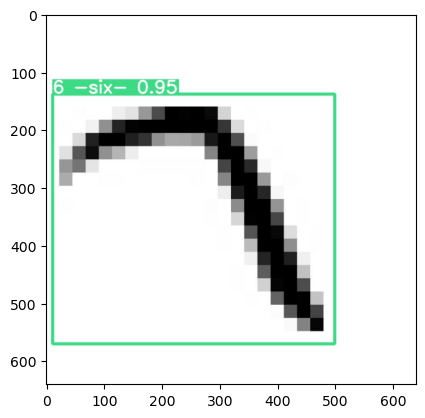

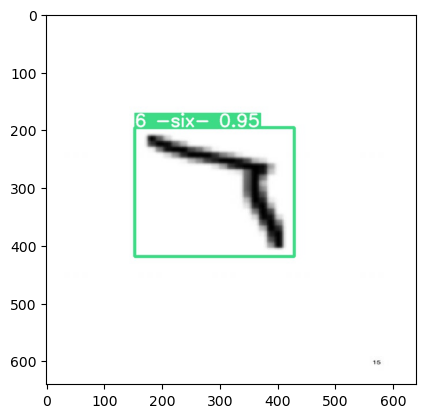

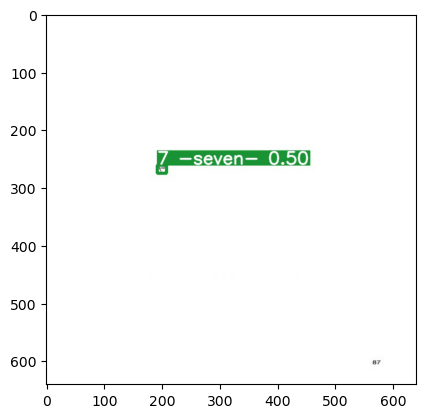

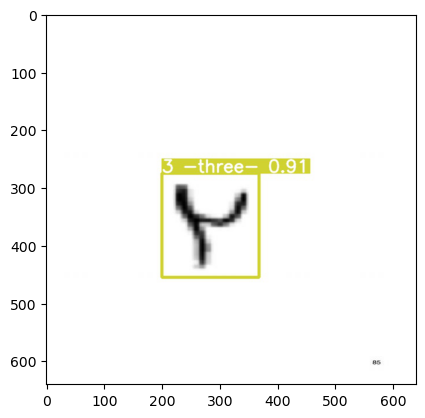

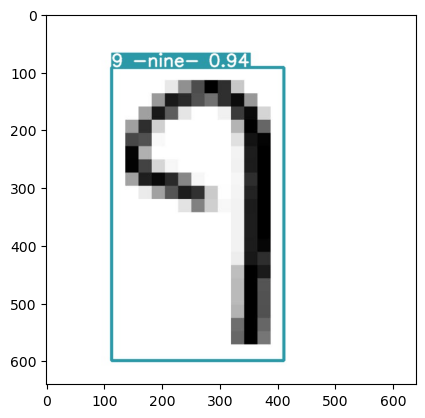

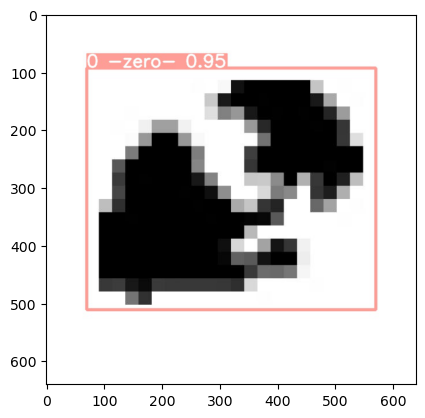

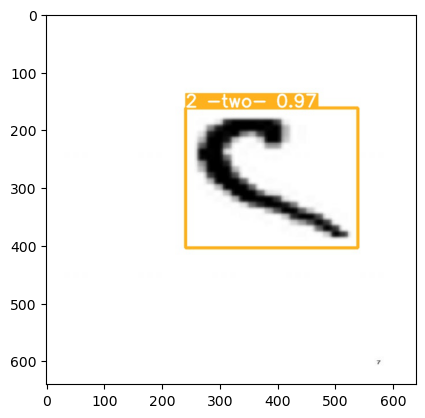

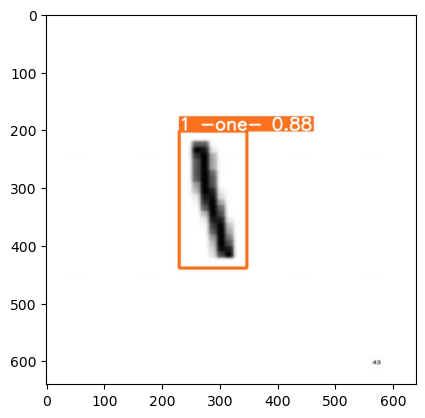

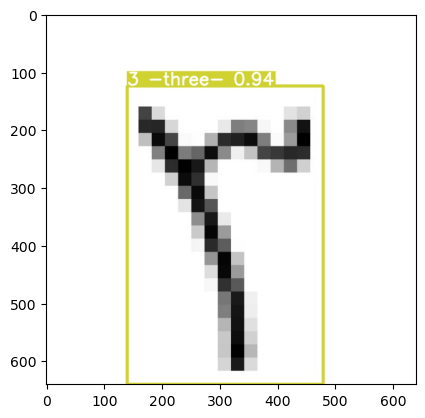

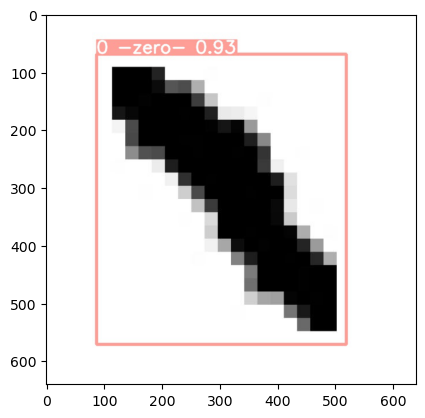

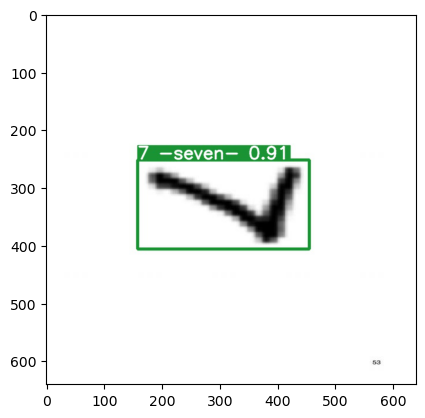

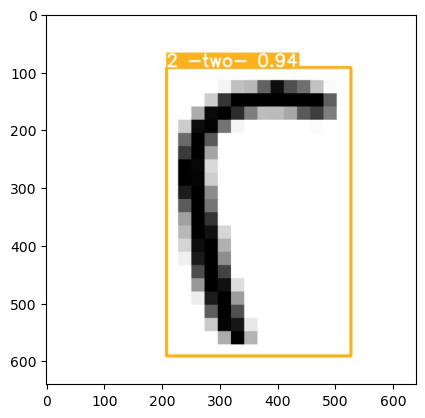

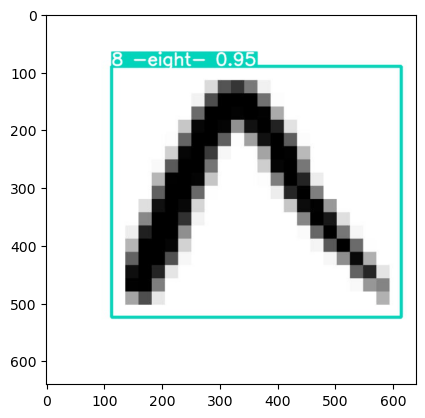

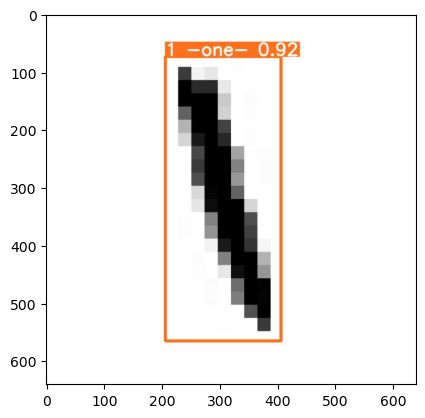

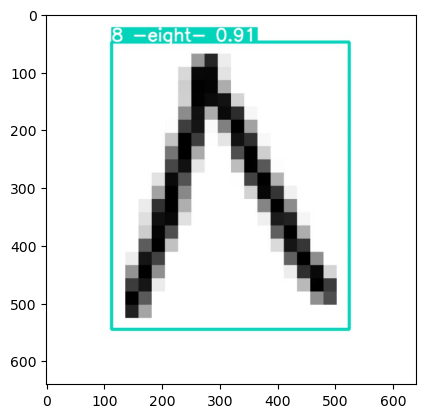

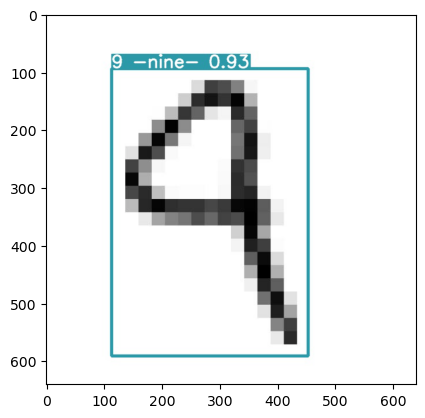

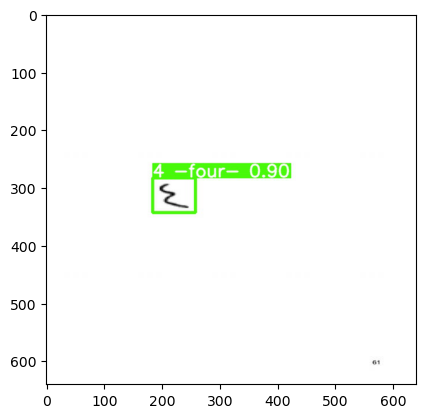

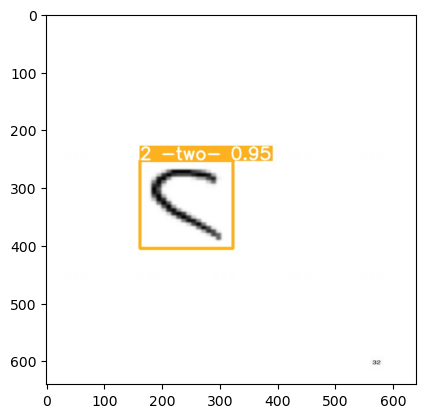

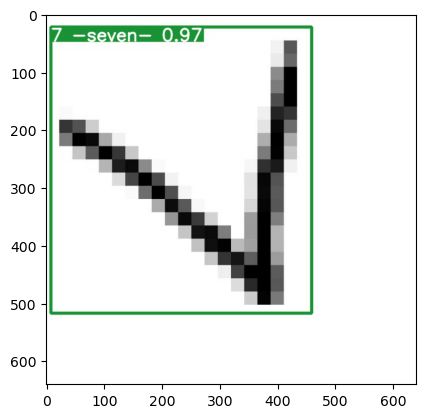

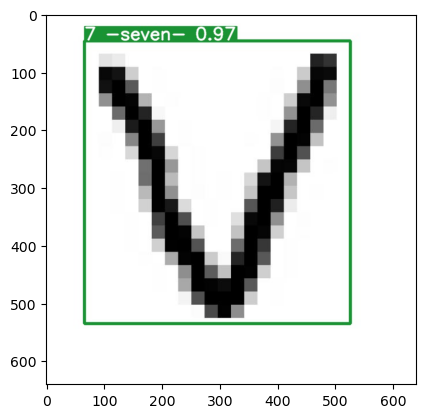

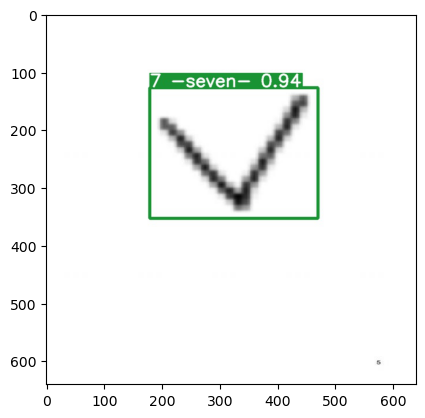

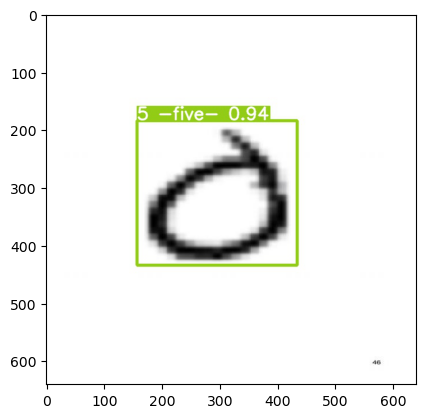

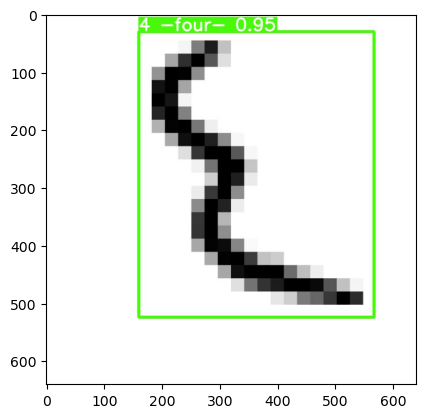

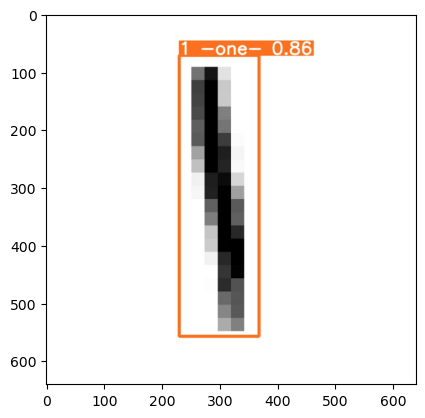

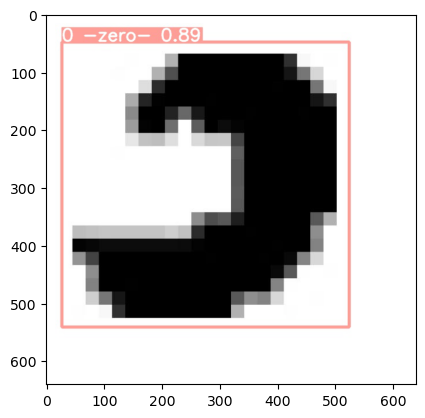

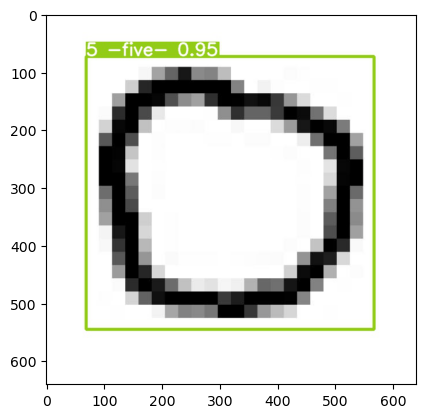

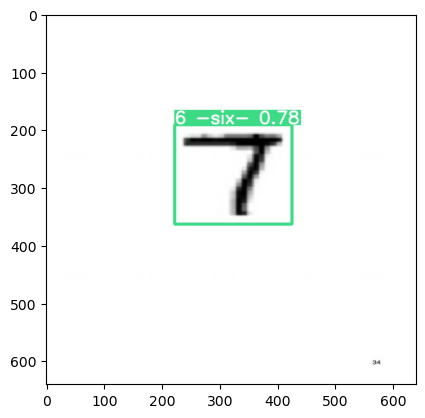

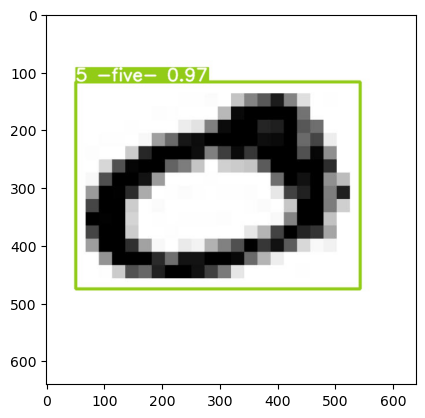

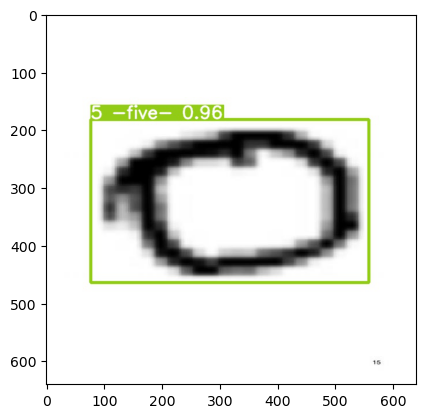

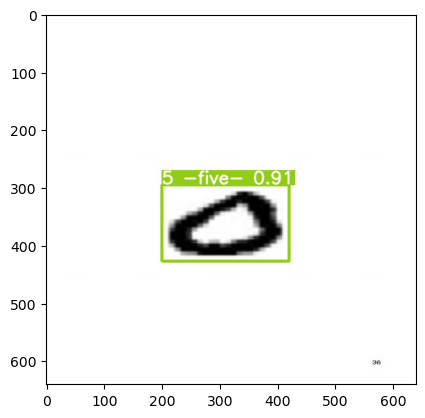

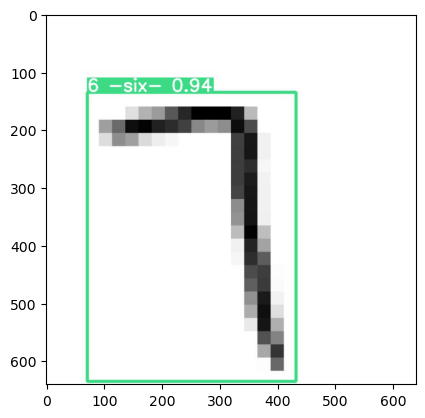

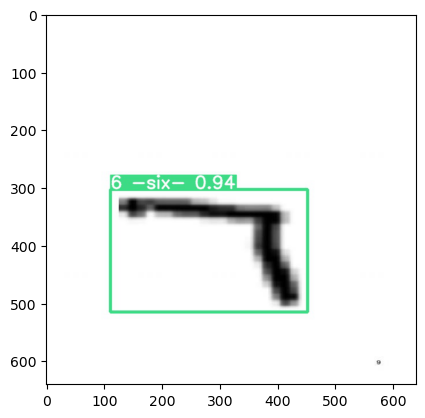

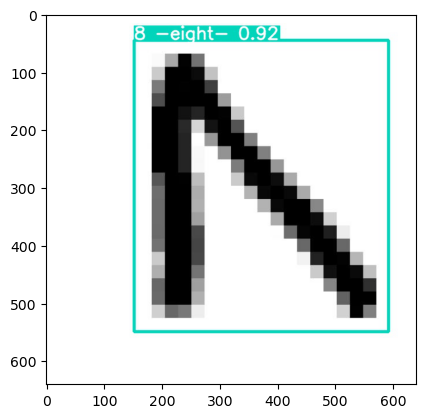

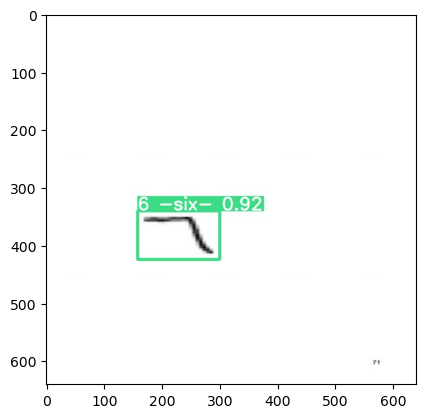

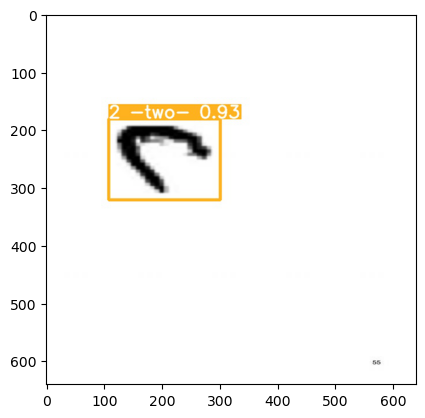

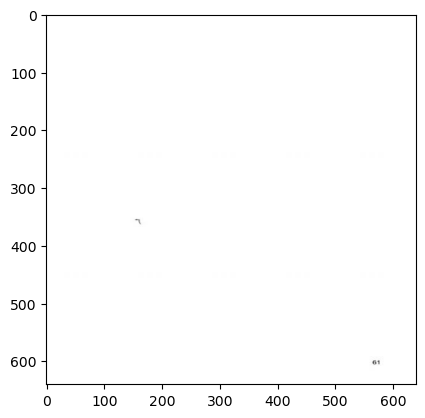

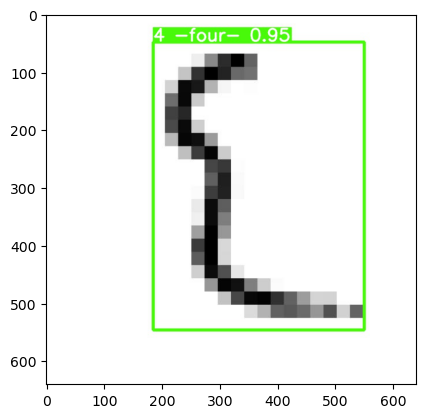

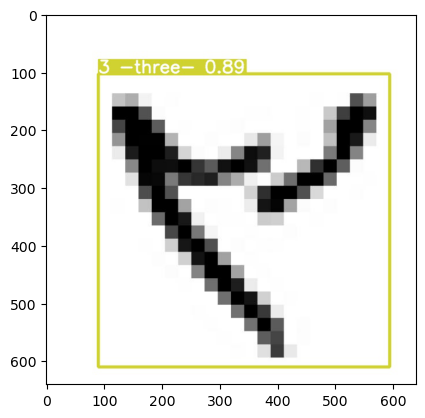

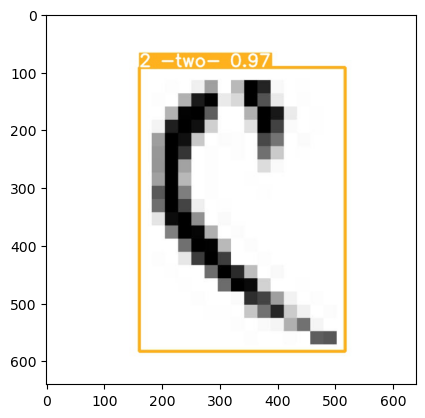

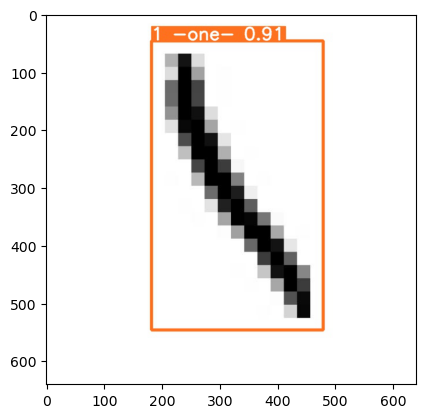

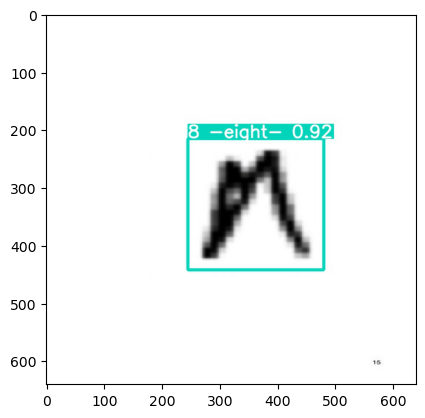

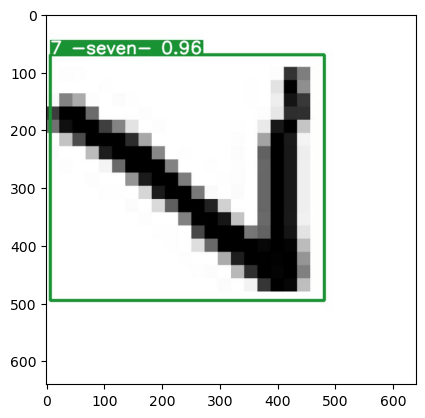

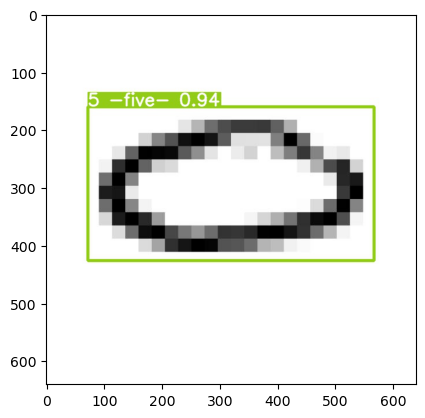

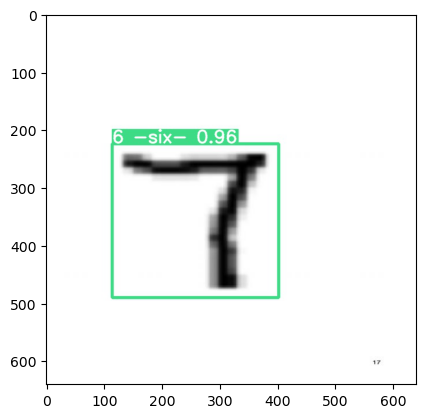

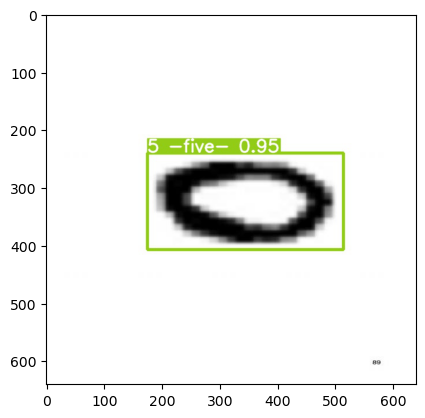

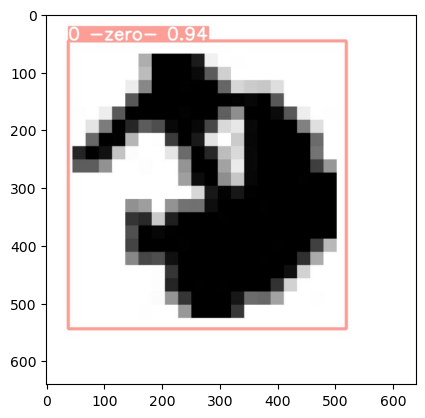

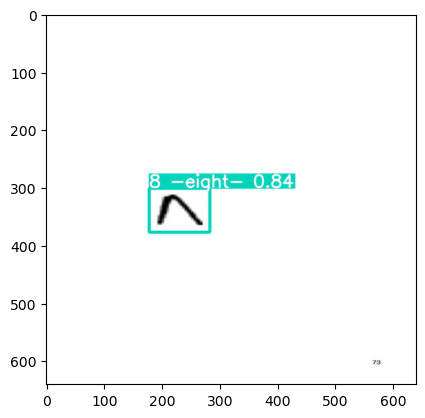

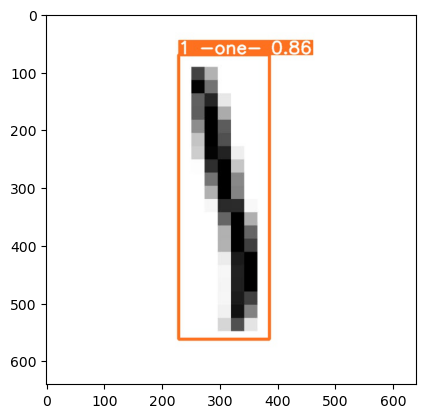

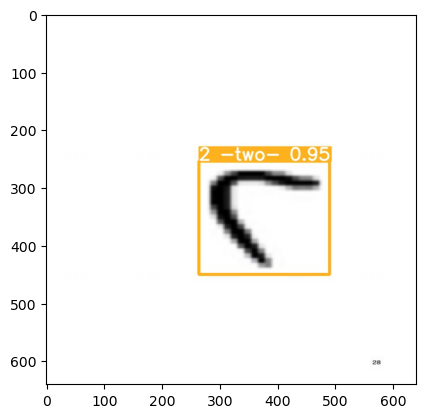

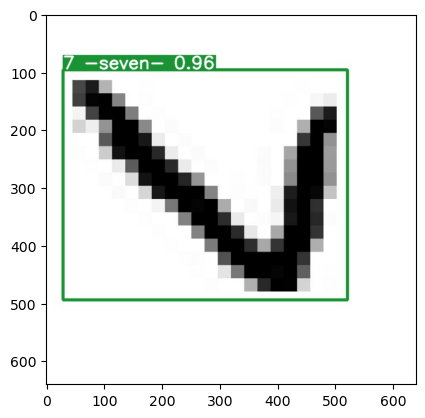

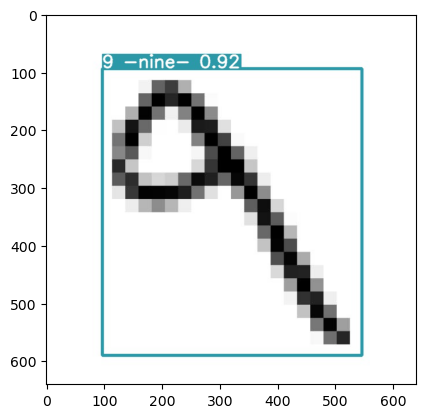

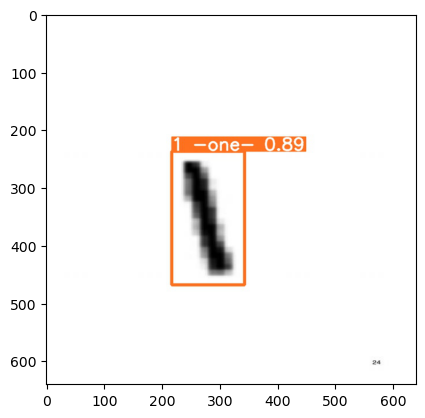

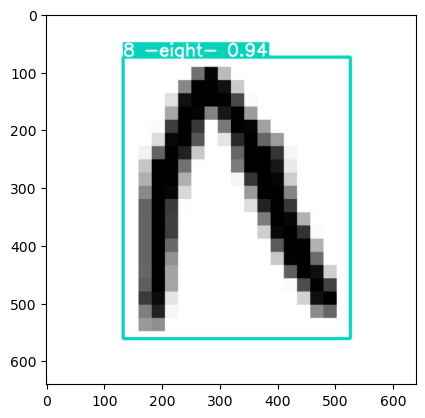

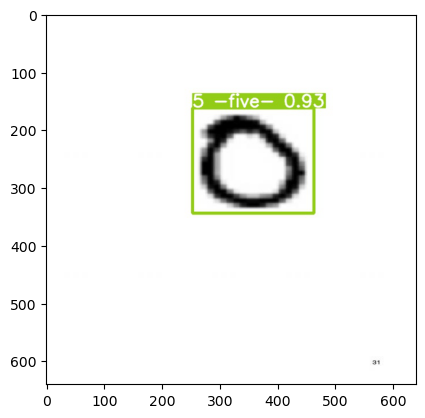

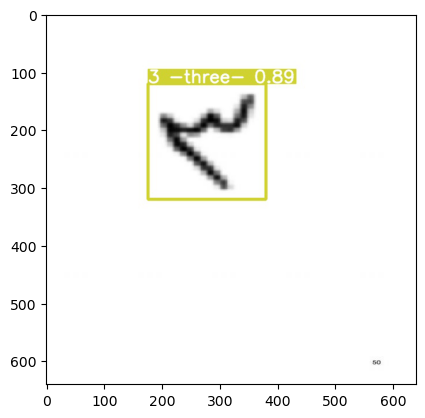

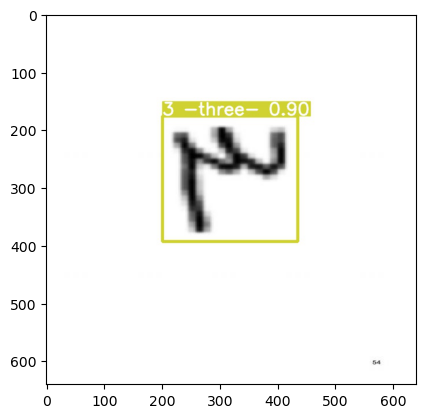

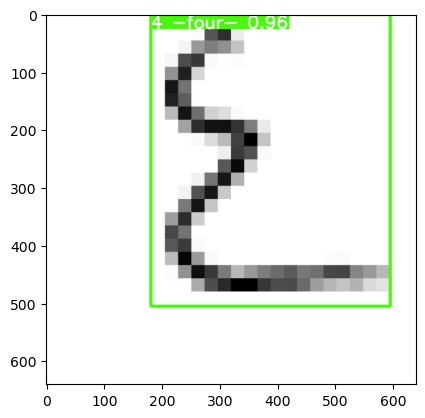

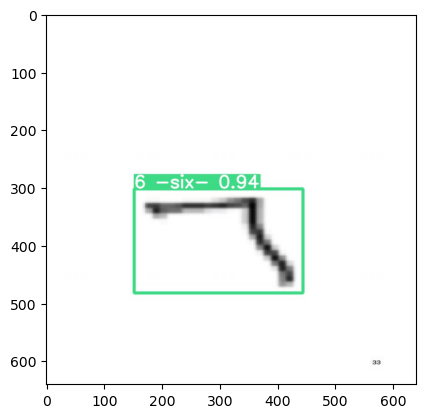

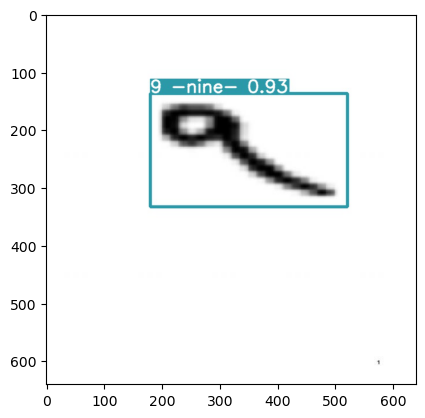

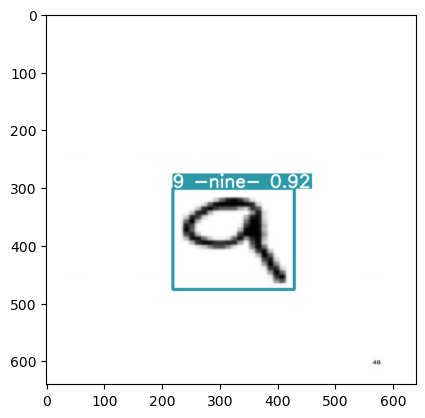

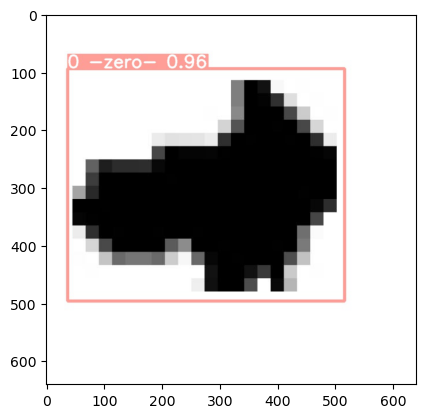

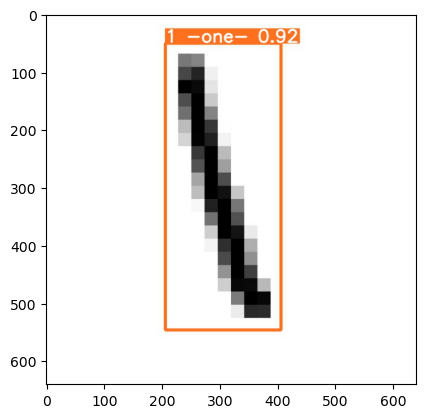

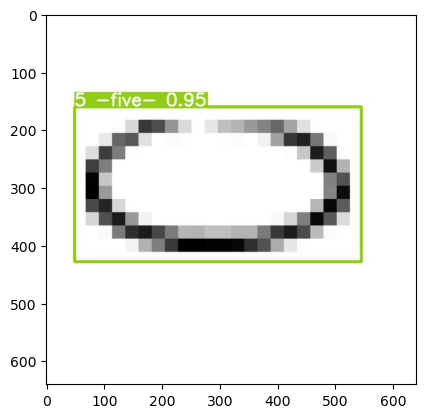

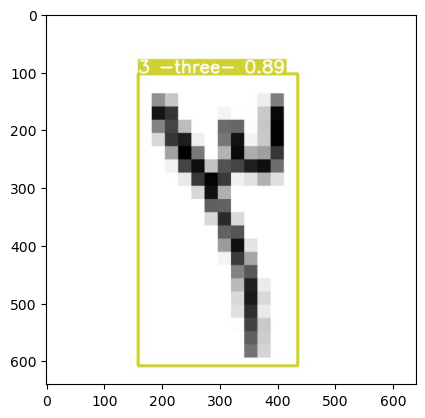

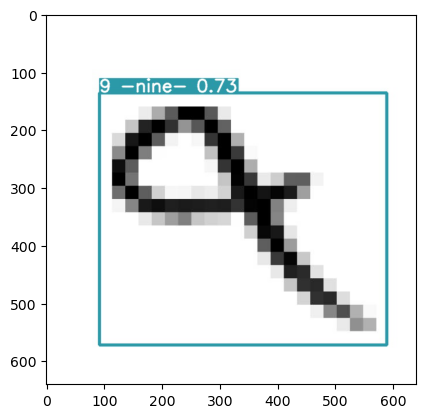

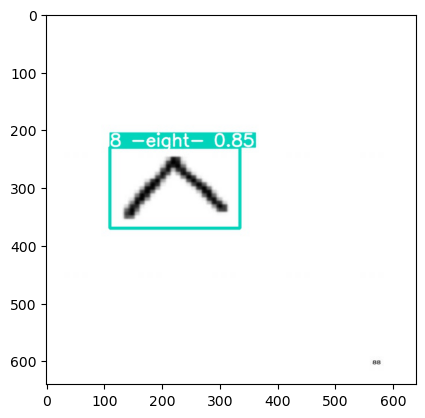

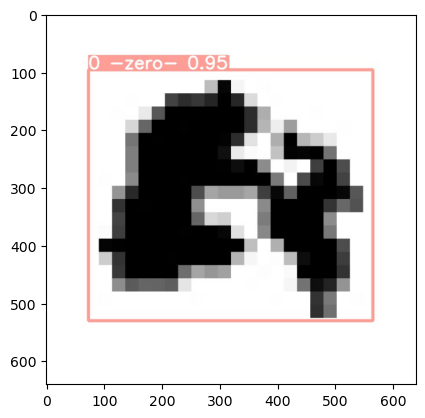

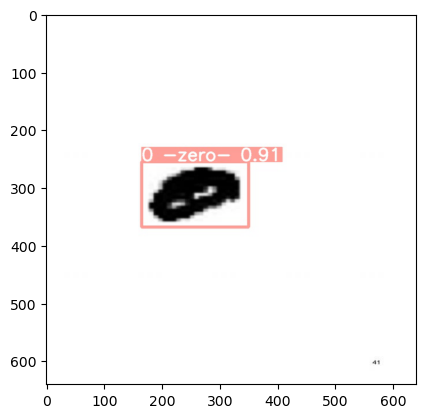

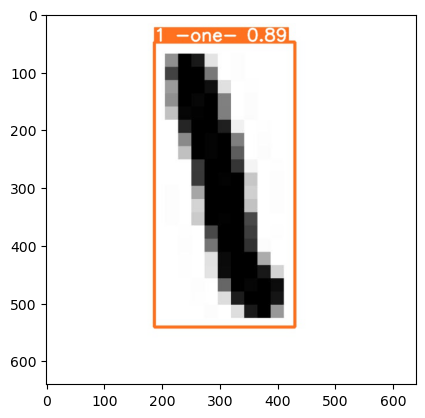

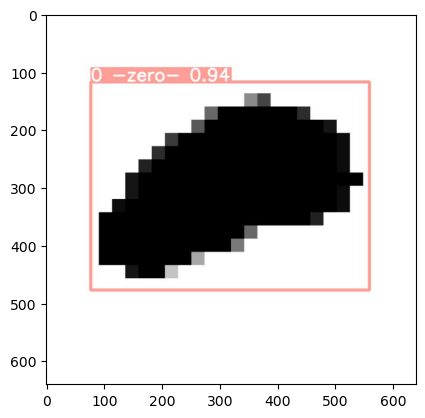

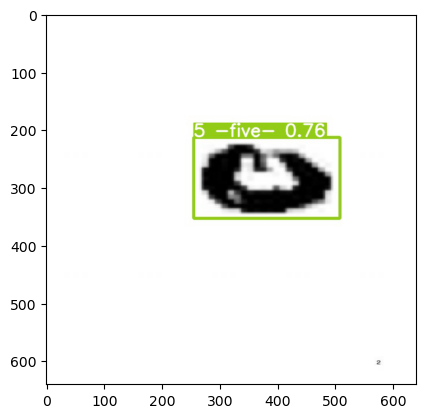

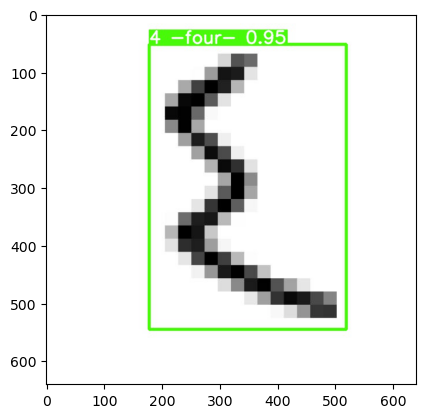

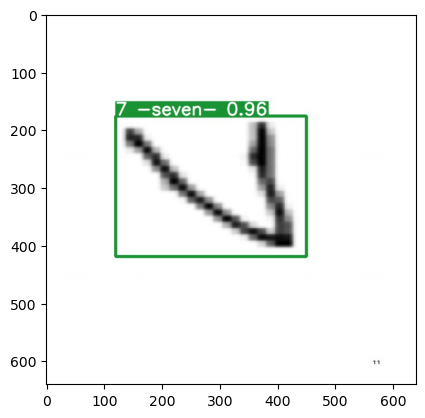

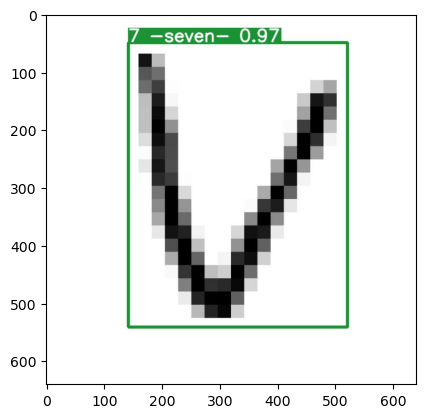

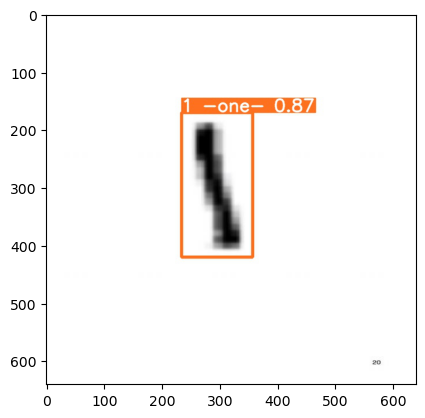

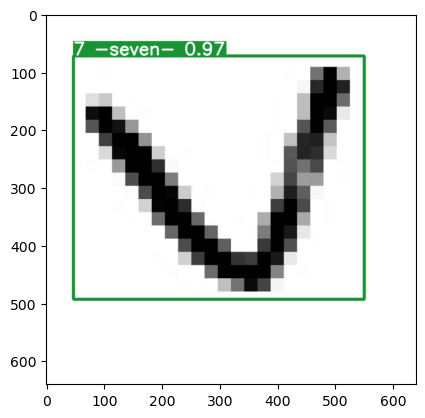

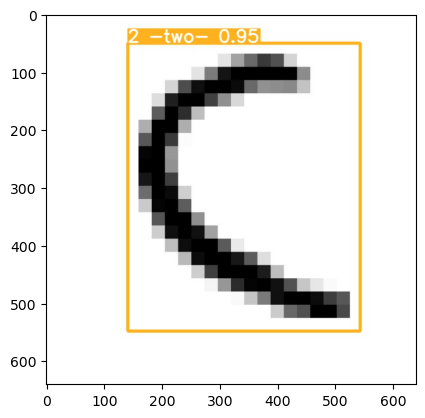

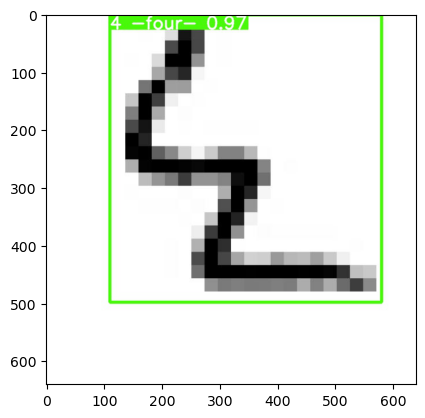

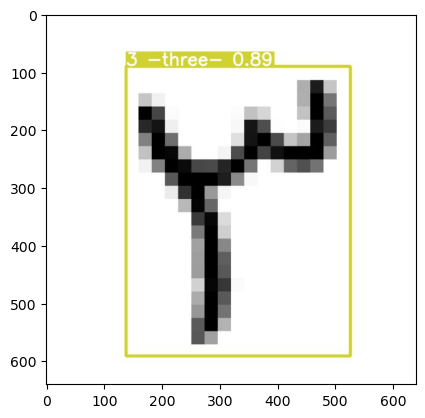

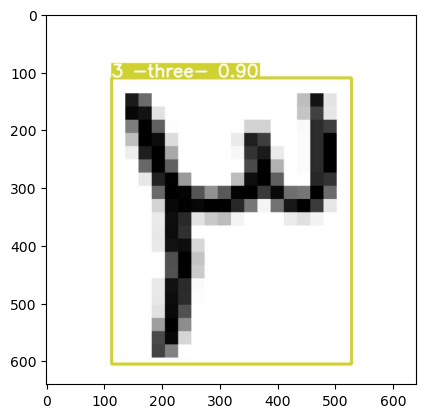

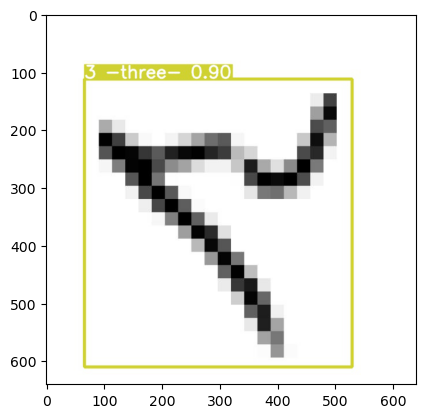

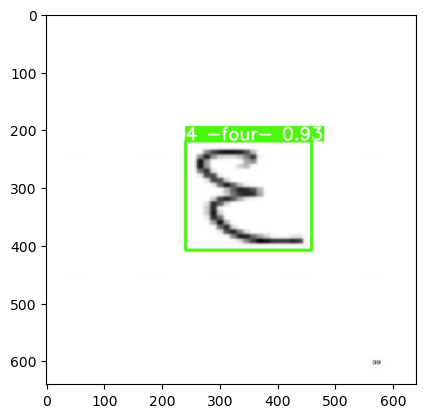

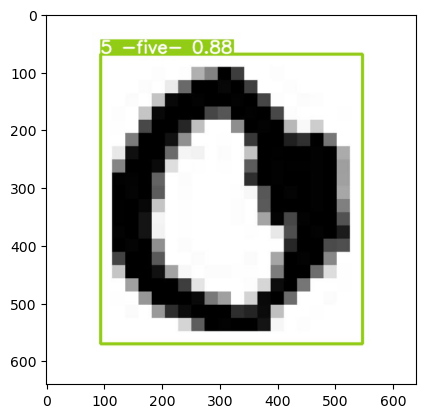

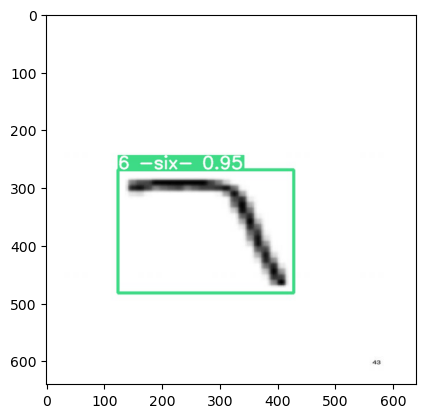

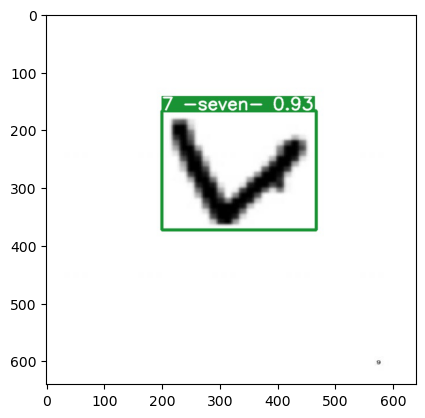

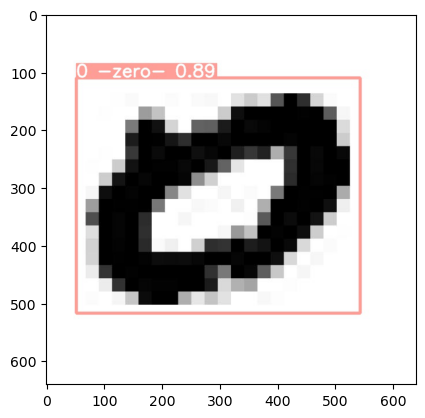

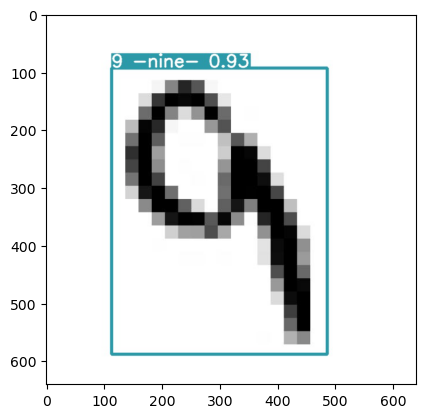

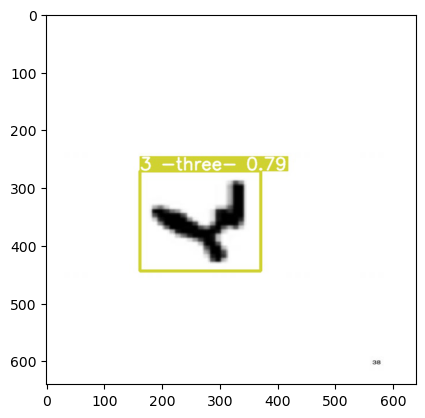

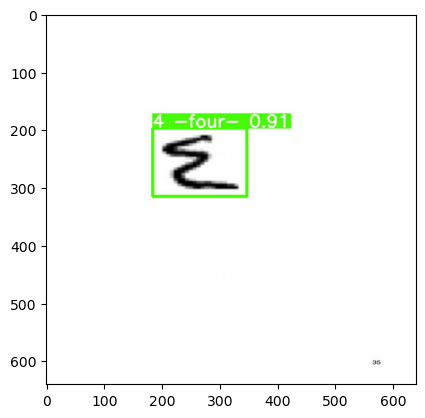

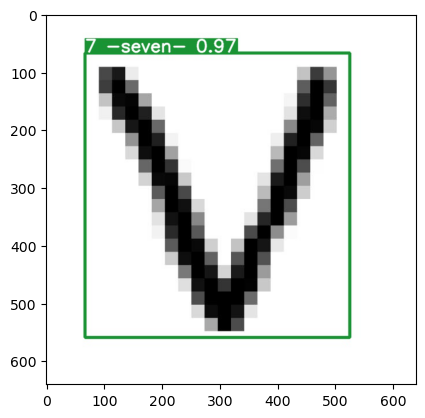

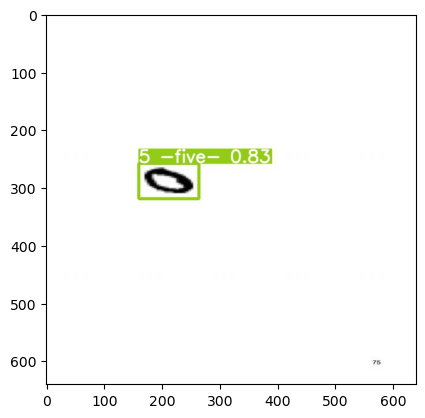

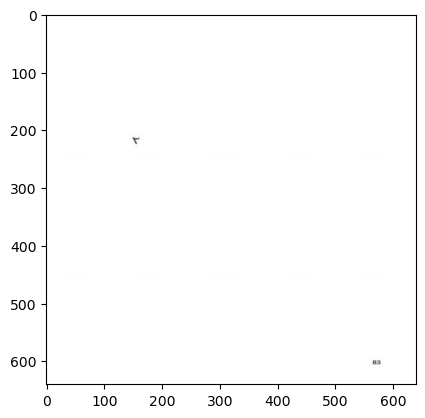

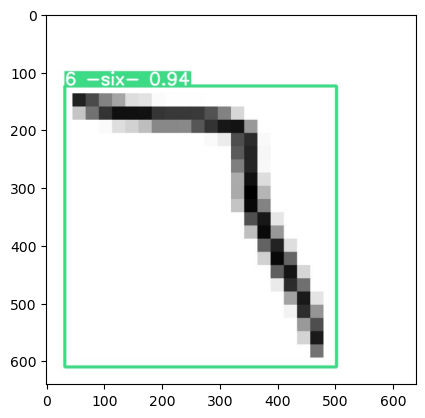

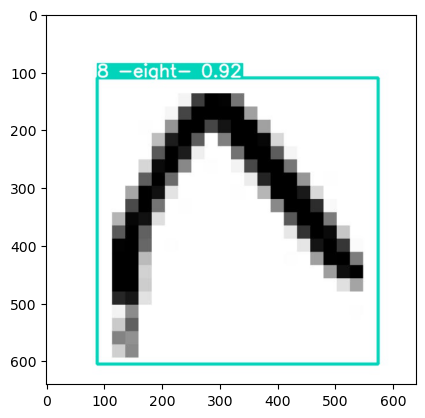

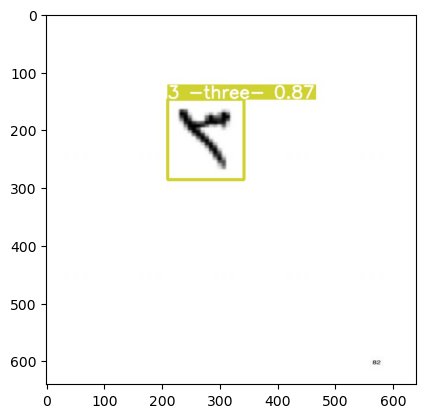

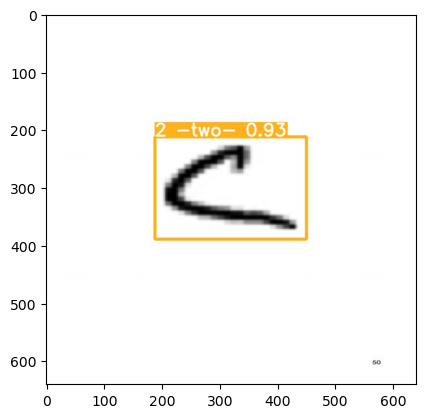

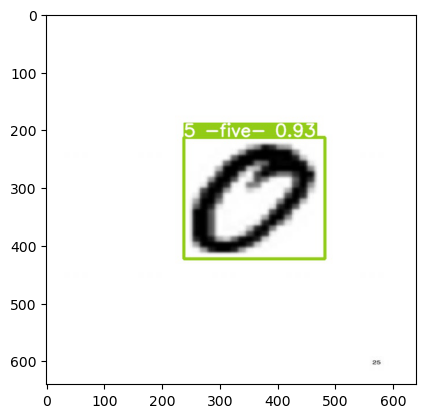

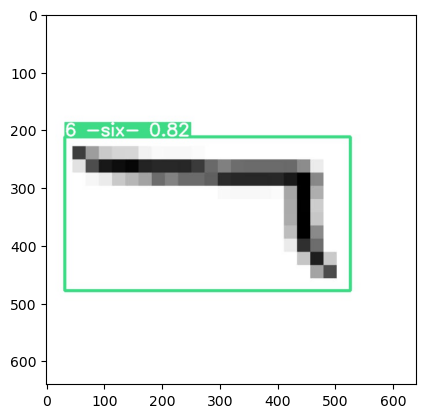

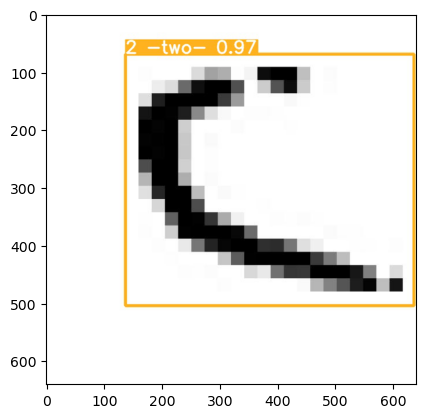

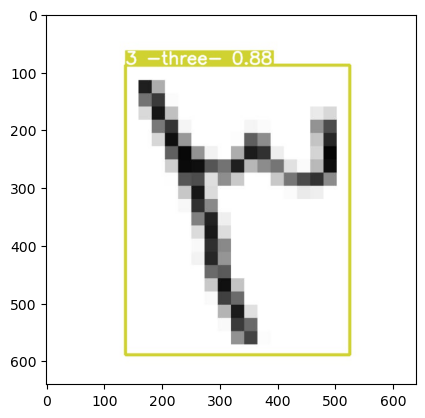

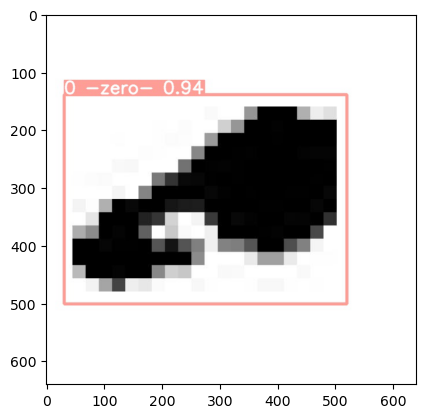

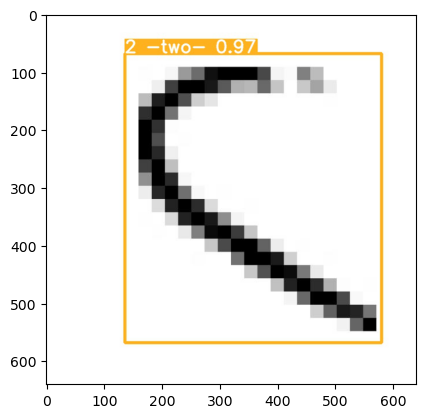

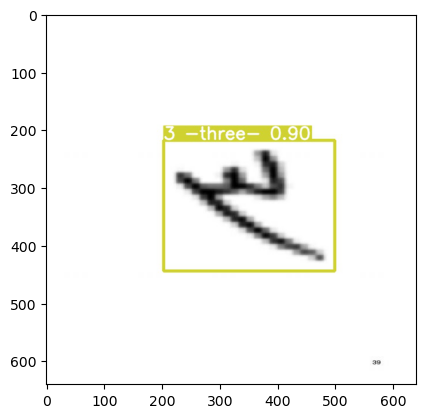

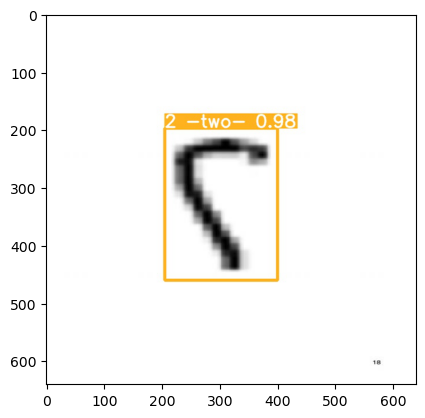

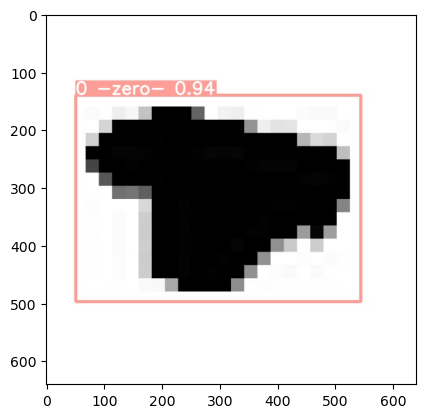

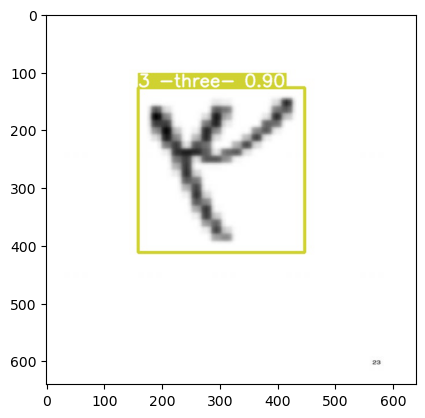

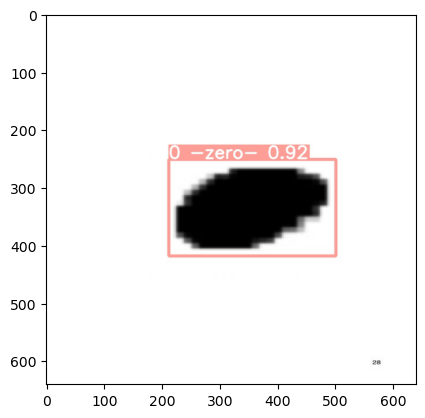

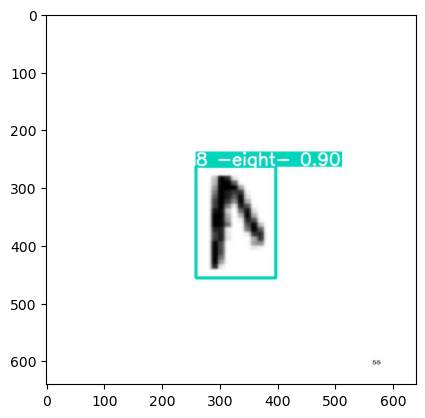

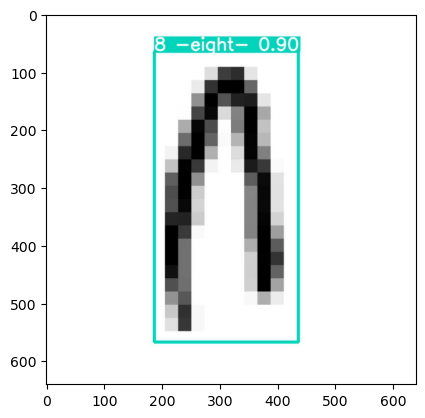

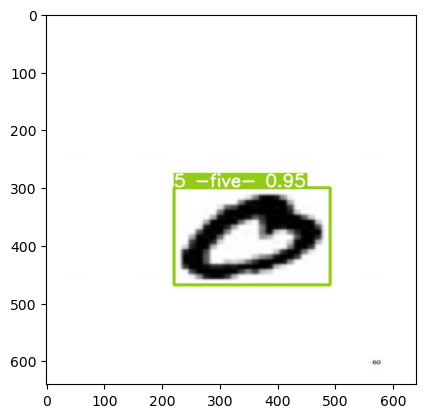

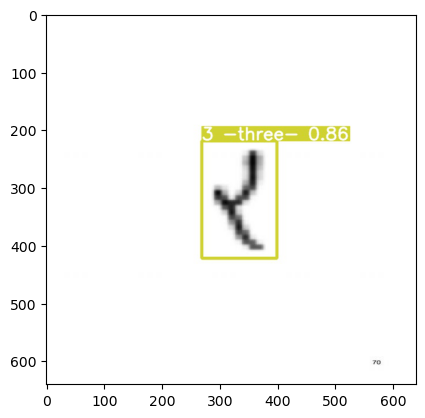

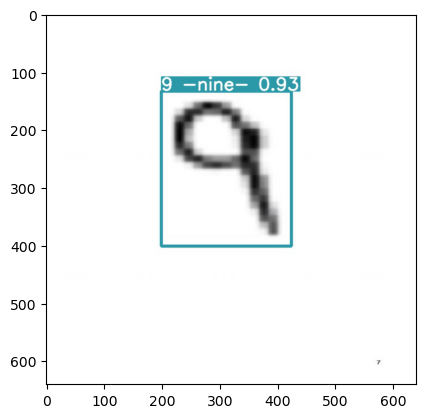

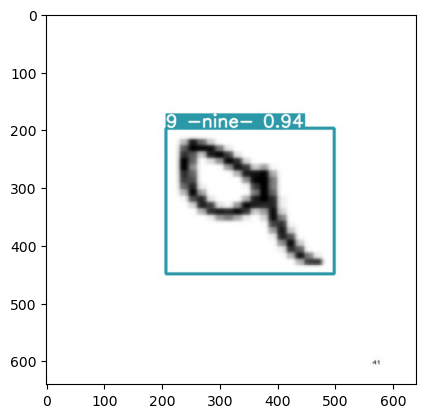

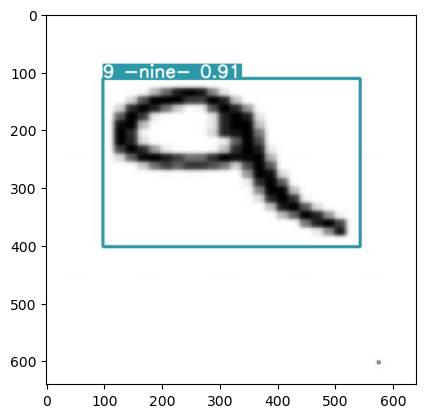

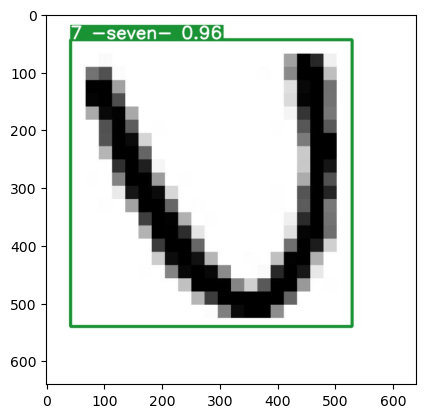

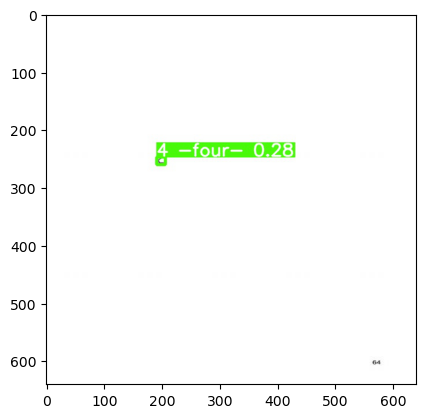

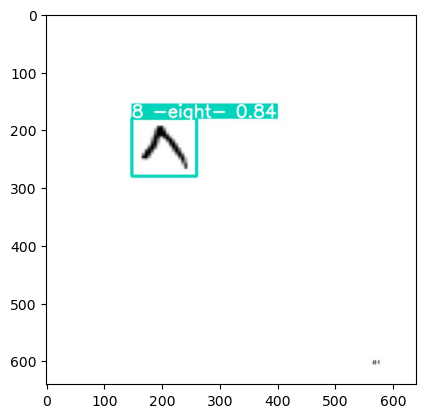

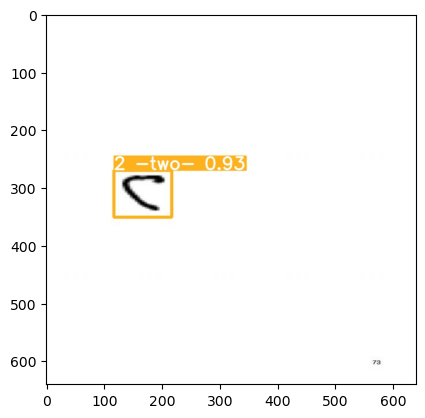

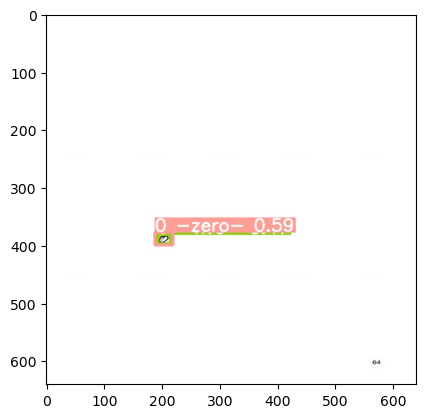

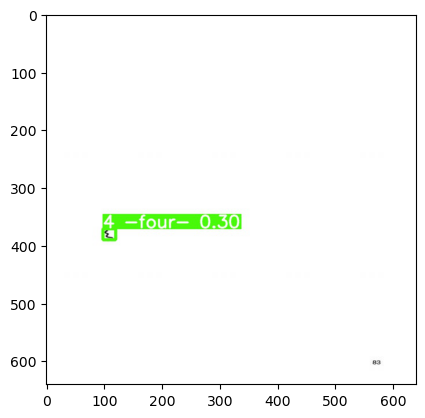

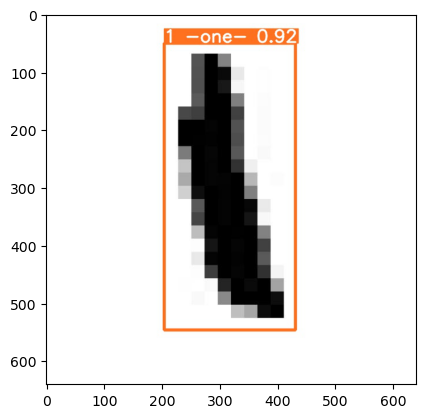

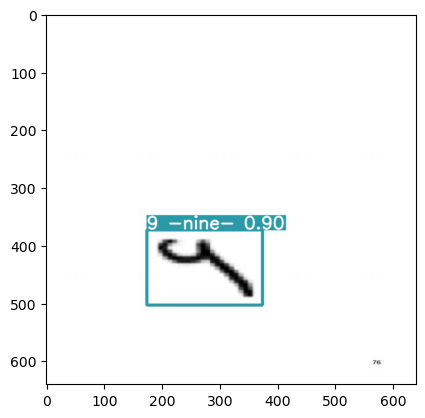

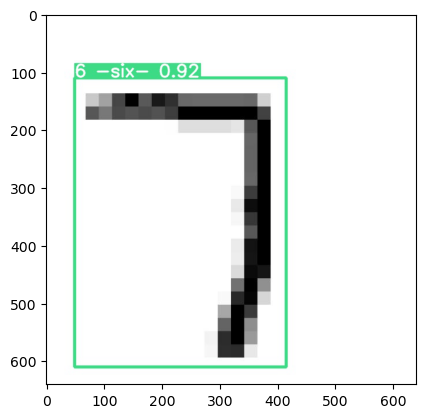

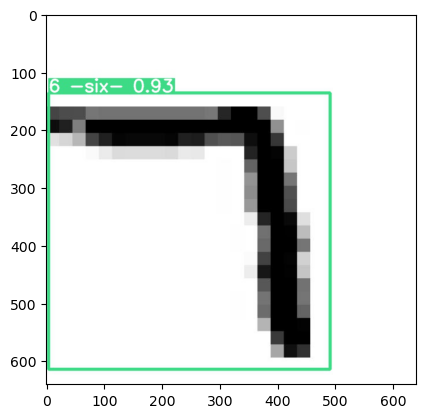

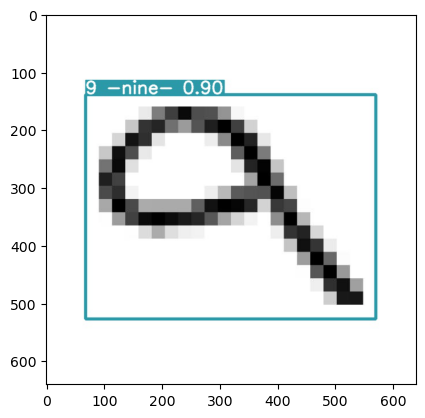

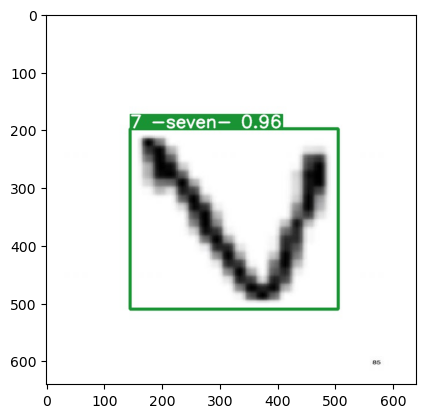

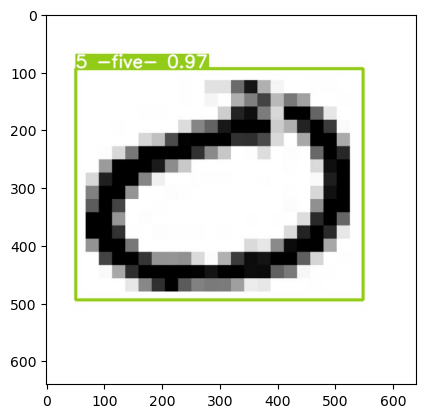

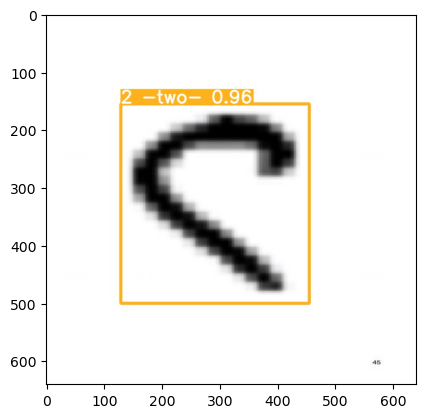

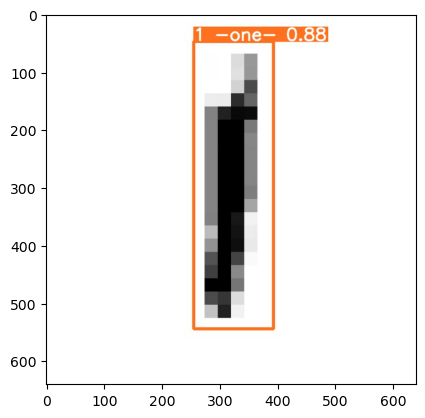

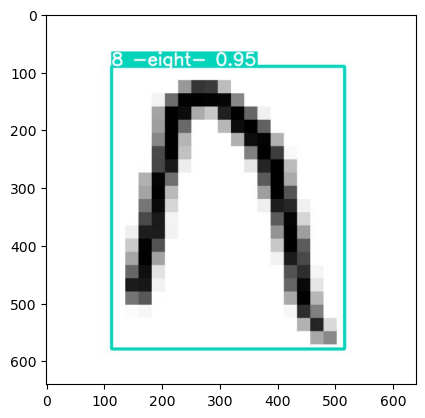

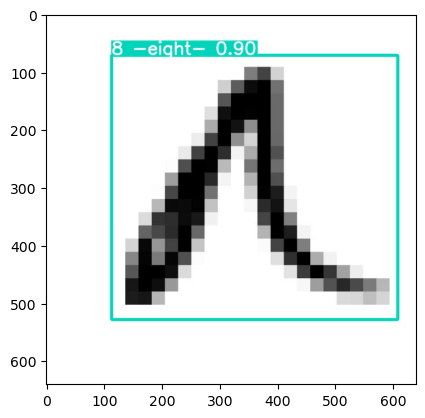

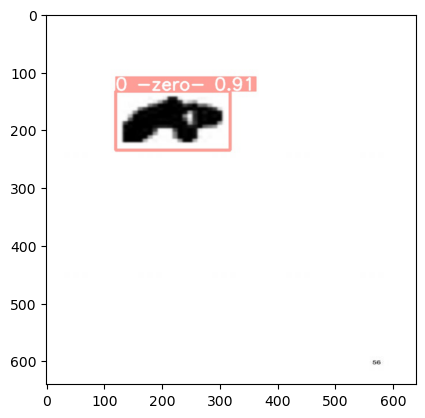

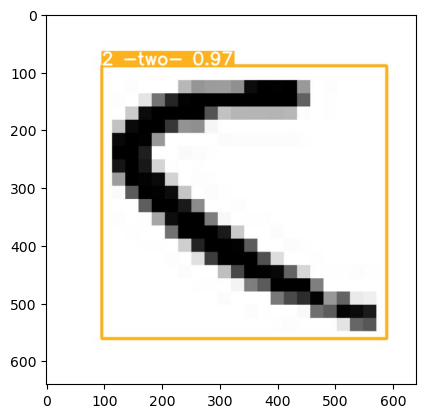

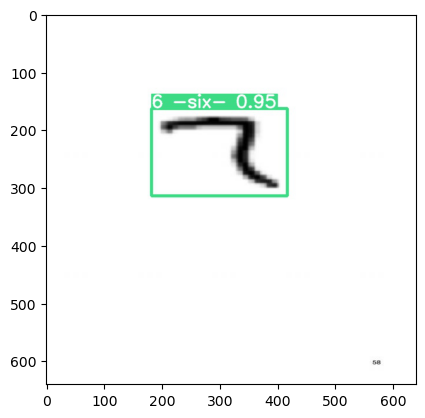

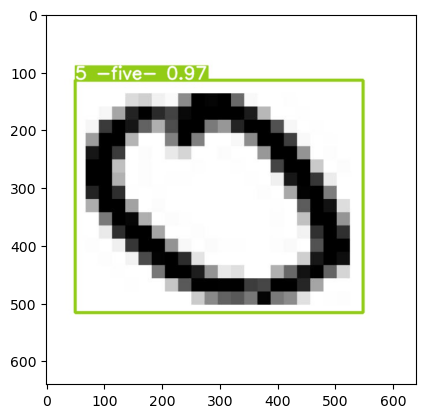

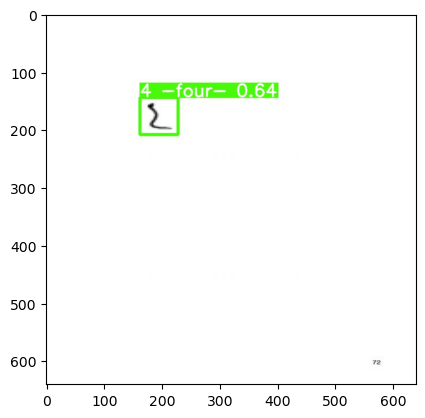

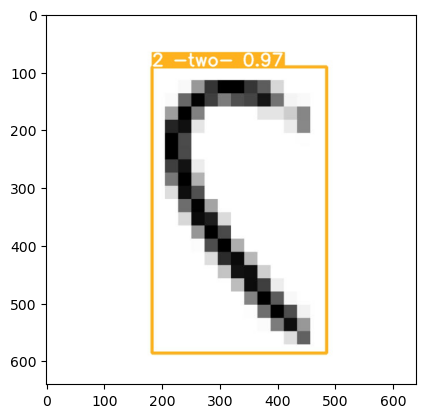

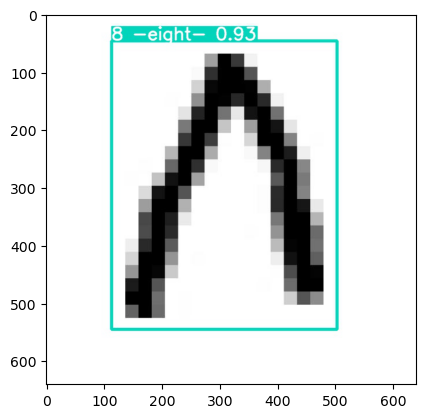

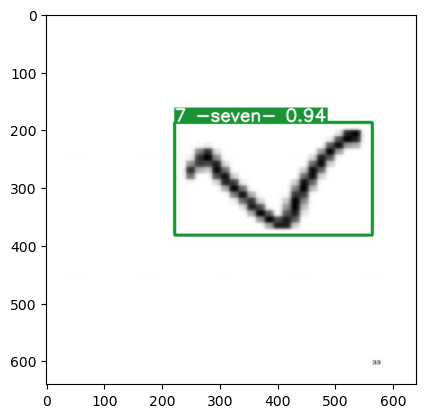

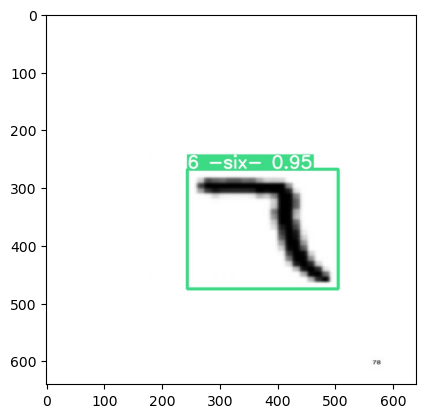

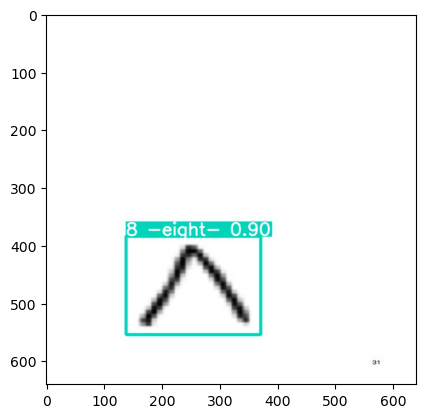

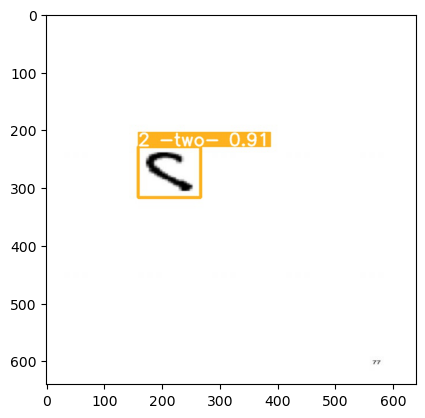

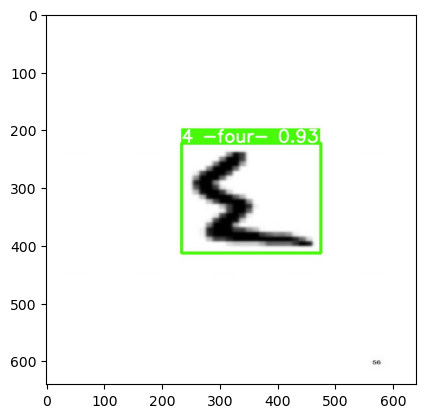

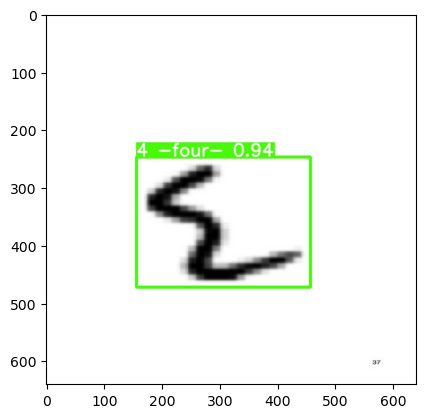

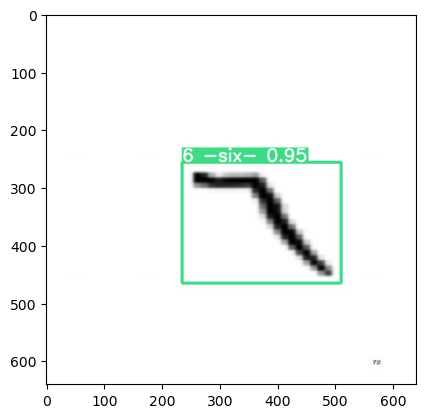

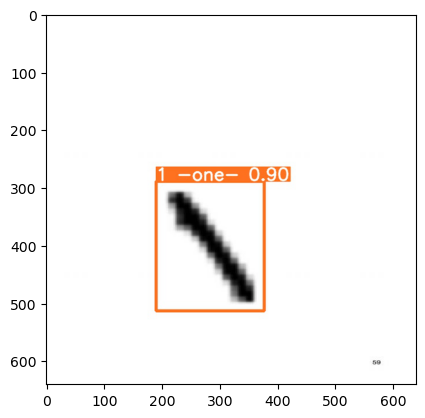

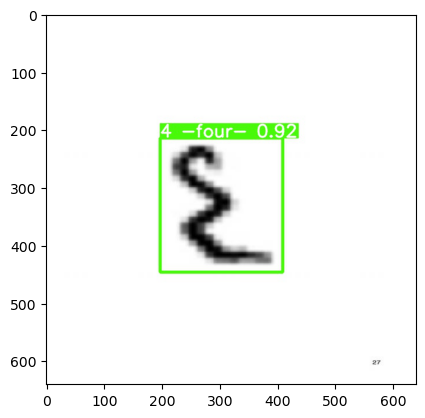

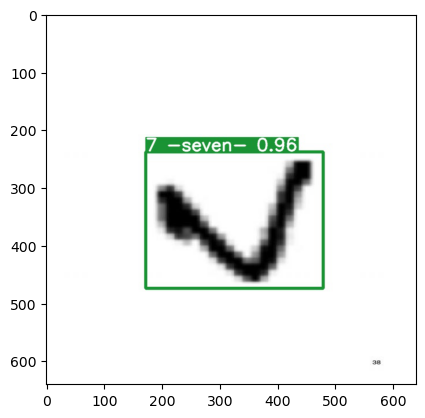

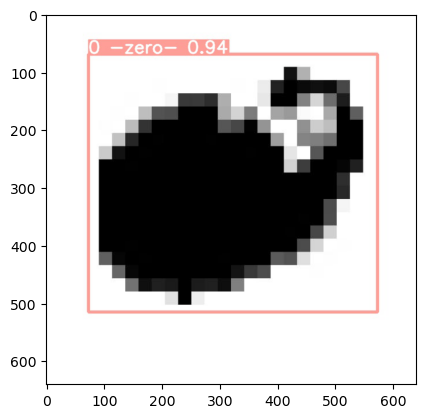

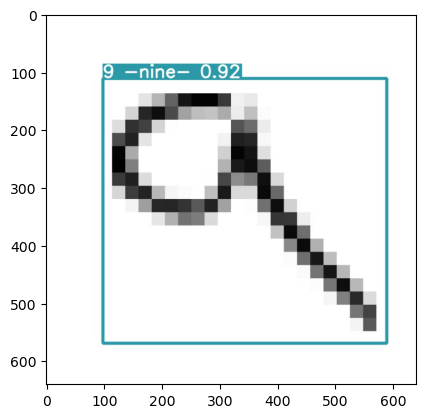

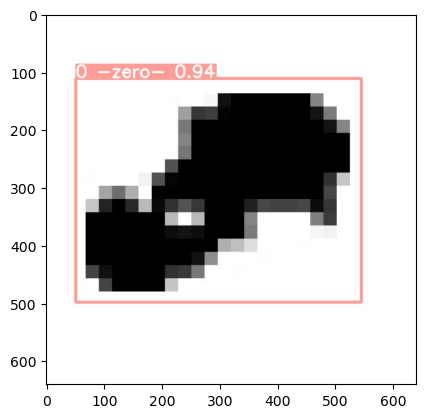

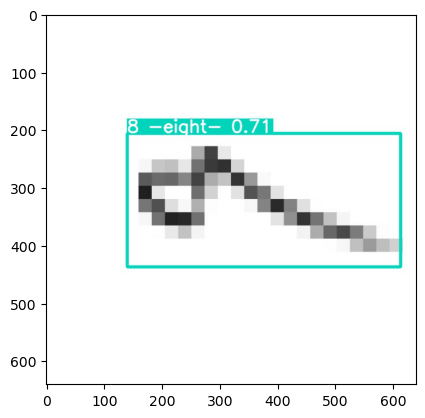

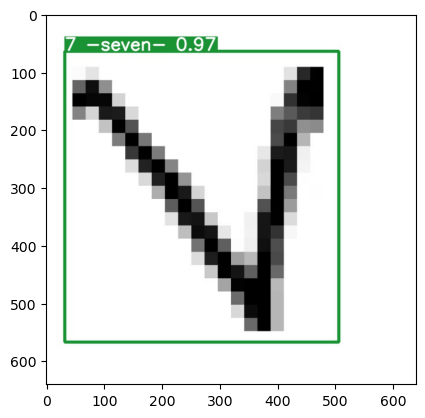

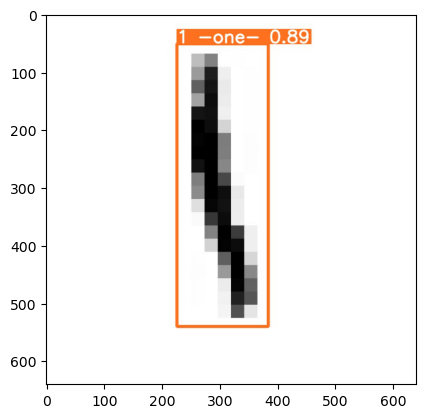

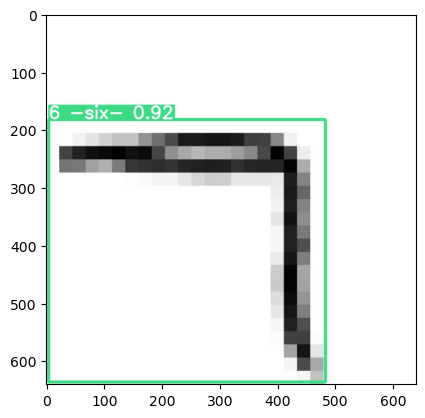

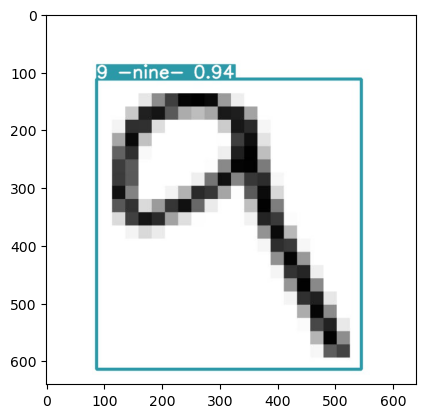

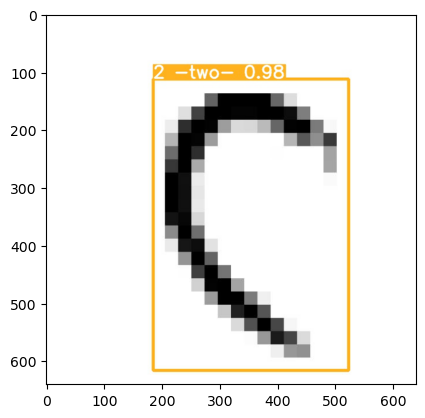

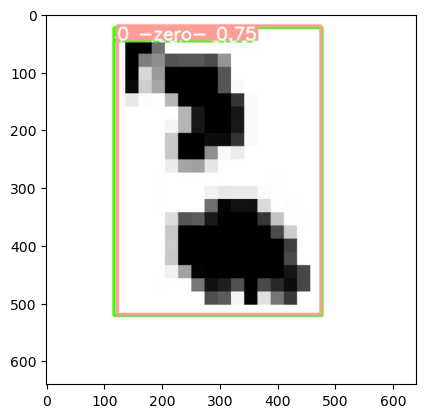

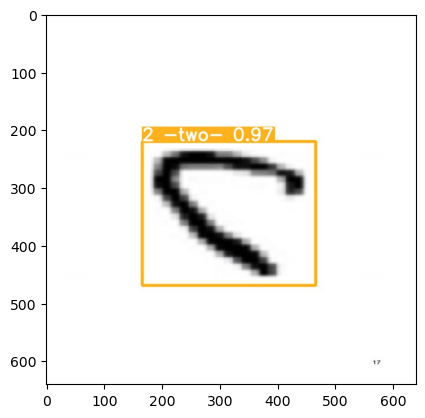

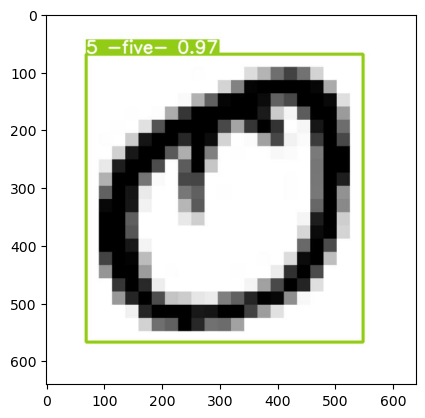

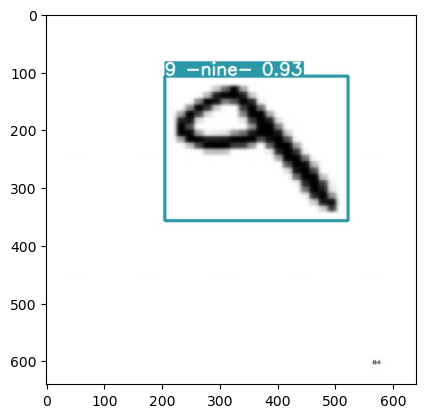

In [14]:
# shows the result of the test images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for filename in os.listdir('runs/detect/predict2'):
  process('runs/detect/predict2/' + filename)

True

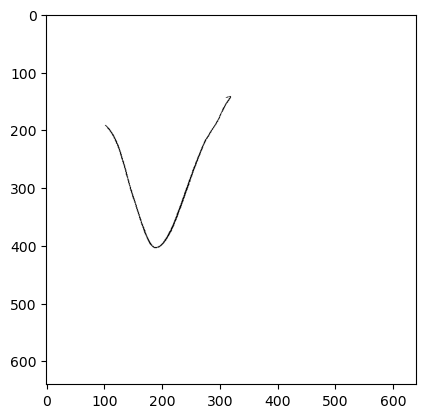

In [4]:
# converts image to white background and black digit
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpeg')
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
img = cv2.resize(img, (640, 640), interpolation = cv2.INTER_AREA)

plt.imshow(img)
cv2.imwrite('image.jpeg', img)

In [15]:
# performs model on the image
!yolo task=detect mode=predict model=../../yolov8_weights/arabic/best.pt conf=0.25 conf=0.25 source='image.jpeg' save=True

Ultralytics YOLOv8.0.41 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/ipynb_files/arabic/image.jpeg: 640x448 1 1 -one-, 1 7 -seven-, 422.2ms
Speed: 1.3ms preprocess, 422.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


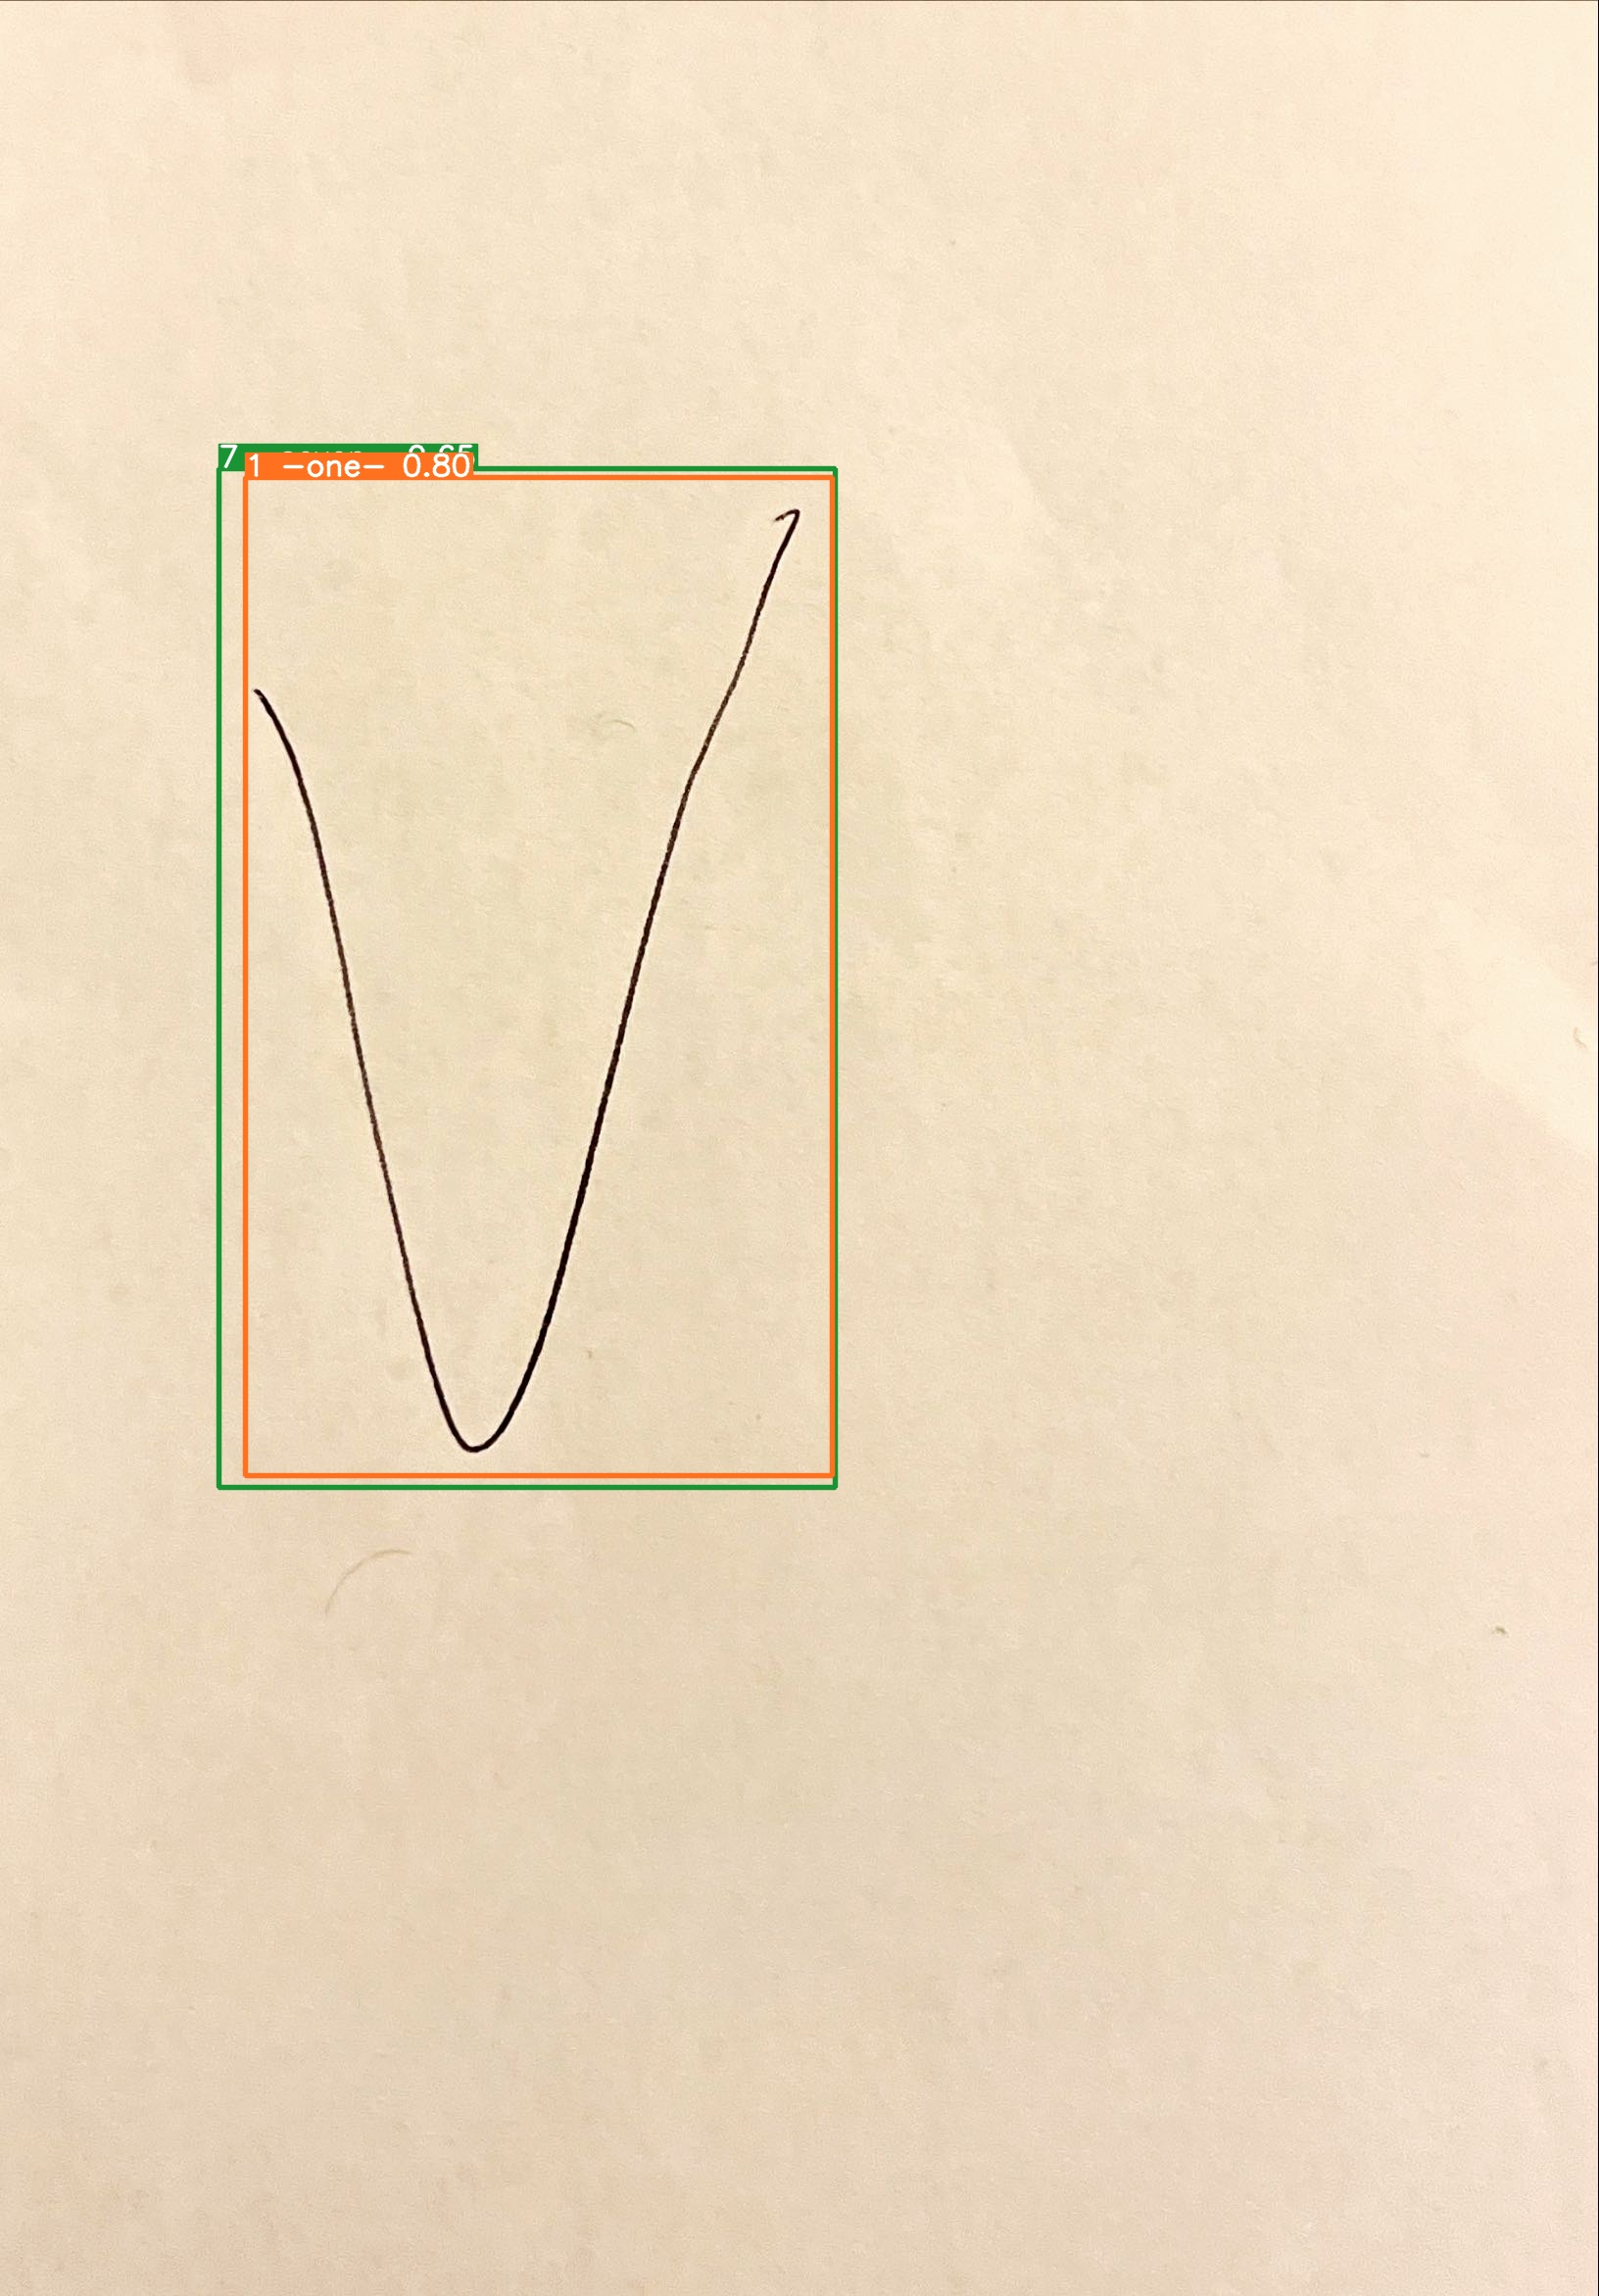

In [16]:
# shows the predictions
from IPython.display import Image, display
Image(filename='runs/detect/predict3/image.jpeg')